In [1]:
# NYC Motor Vehicle Collisions - Milestone 1: Data Cleaning & Integration

## ============================================================================
## SECTION 1: SETUP AND DATA LOADING
## ============================================================================

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("NYC MOTOR VEHICLE COLLISIONS - DATA ENGINEERING PROJECT")
print("="*80)

# Load the datasets
print("\n Loading NYC Motor Vehicle Collisions datasets...")
print("This may take a few minutes due to large file sizes...\n")

# Load crashes dataset
crashes_url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=download'
df_crashes = pd.read_csv(crashes_url, low_memory=False)

# Load persons dataset
persons_url = 'https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download'
df_persons = pd.read_csv(persons_url, low_memory=False)

print("Datasets loaded successfully!")
print(f"   Crashes dataset shape: {df_crashes.shape}")
print(f"   Persons dataset shape: {df_persons.shape}\n") 


NYC MOTOR VEHICLE COLLISIONS - DATA ENGINEERING PROJECT

 Loading NYC Motor Vehicle Collisions datasets...
This may take a few minutes due to large file sizes...

Datasets loaded successfully!
   Crashes dataset shape: (2221559, 29)
   Persons dataset shape: (5823480, 21)



In [2]:

## ============================================================================
## SECTION 2: EXPLORATORY DATA ANALYSIS (EDA) - CRASHES DATASET
## ============================================================================

print("="*80)
print("EXPLORATORY DATA ANALYSIS - CRASHES DATASET")
print("="*80)

print("\n1. DATASET STRUCTURE")
print("-" * 80)
print(f"Number of records: {df_crashes.shape[0]:,}")
print(f"Number of columns: {df_crashes.shape[1]}")
print(f"\nColumn names and data types:")
print(df_crashes.dtypes)

print("\n2. FIRST FEW RECORDS")
print("-" * 80)
display(df_crashes.head(10))

print("\n3. MISSING VALUES ANALYSIS")
print("-" * 80)
missing_crashes = df_crashes.isnull().sum()
missing_pct_crashes = (missing_crashes / len(df_crashes) * 100).round(2)
missing_df_crashes = pd.DataFrame({
    'Missing_Count': missing_crashes,
    'Percentage': missing_pct_crashes
}).sort_values('Percentage', ascending=False)

print("Columns with missing values:")
display(missing_df_crashes[missing_df_crashes['Missing_Count'] > 0])

print("\n4. DESCRIPTIVE STATISTICS - NUMERICAL COLUMNS")
print("-" * 80)
display(df_crashes.describe())

print("\n5. CATEGORICAL COLUMNS ANALYSIS")
print("-" * 80)
categorical_cols = ['BOROUGH', 'VEHICLE TYPE CODE 1', 'CONTRIBUTING FACTOR VEHICLE 1']
for col in categorical_cols:
    if col in df_crashes.columns:
        print(f"\n{col} - Top 10 values:")
        print(df_crashes[col].value_counts().head(10))

EXPLORATORY DATA ANALYSIS - CRASHES DATASET

1. DATASET STRUCTURE
--------------------------------------------------------------------------------
Number of records: 2,221,559
Number of columns: 29

Column names and data types:
CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
5,04/26/2023,13:30,NaN,NaN,NaN,NaN,NaN,WEST 54 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4623759,Sedan,Box Truck,NaN,NaN,NaN
6,11/01/2023,7:12,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Driver Inattention/Distraction,NaN,NaN,NaN,4675709,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
7,11/01/2023,8:01,NaN,NaN,NaN,NaN,NaN,WEST 35 STREET,HENRY HUDSON RIVER,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4675769,Sedan,NaN,NaN,NaN,NaN
8,04/26/2023,22:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61 Ed Koch queensborough bridge,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4623865,Sedan,Pick-up Truck,NaN,NaN,NaN
9,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN



3. MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------
Columns with missing values:


,Missing_Count,Percentage
VEHICLE TYPE CODE 5,2211820,99.56
CONTRIBUTING FACTOR VEHICLE 5,2211504,99.55
VEHICLE TYPE CODE 4,2186192,98.41
CONTRIBUTING FACTOR VEHICLE 4,2184860,98.35
VEHICLE TYPE CODE 3,2067042,93.04
CONTRIBUTING FACTOR VEHICLE 3,2060796,92.76
OFF STREET NAME,1829917,82.37
CROSS STREET NAME,848936,38.21
ZIP CODE,680770,30.64
BOROUGH,680493,30.63



4. DESCRIPTIVE STATISTICS - NUMERICAL COLUMNS
--------------------------------------------------------------------------------


,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.981191e+06,1.981191e+06,2.221541e+06,2.221528e+06,2.221559e+06,2.221559e+06,2.221559e+06,2.221559e+06,2.221559e+06,2.221559e+06,2.221559e+06
mean,4.058943e+01,-7.368250e+01,3.283698e-01,1.584495e-03,5.963605e-02,7.841340e-04,2.920607e-02,1.260376e-04,2.348774e-01,6.445924e-04,3.266547e+06
std,2.337448e+00,4.344364e+00,7.149952e-01,4.205168e-02,2.501303e-01,2.862744e-02,1.706541e-01,1.126597e-02,6.761357e-01,2.776896e-02,1.509613e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066734e+01,-7.397453e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.191510e+06
50%,4.072031e+01,-7.392673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.747074e+06
75%,4.076956e+01,-7.386657e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.302676e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.858367e+06



5. CATEGORICAL COLUMNS ANALYSIS
--------------------------------------------------------------------------------

BOROUGH - Top 10 values:
BOROUGH
BROOKLYN         493922
QUEENS           412931
MANHATTAN        341511
BRONX            228187
STATEN ISLAND     64515
Name: count, dtype: int64

VEHICLE TYPE CODE 1 - Top 10 values:
VEHICLE TYPE CODE 1
Sedan                                  642338
Station Wagon/Sport Utility Vehicle    503047
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    55884
4 dr sedan                              40187
Pick-up Truck                           38269
TAXI                                    31911
Box Truck                               26565
VAN                                     25266
Name: count, dtype: int64

CONTRIBUTING FACTOR VEHICLE 1 - Top 10 values:
CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       743539
Driver Inattention/Distraction    451008
Fa


EXPLORATORY DATA ANALYSIS - PERSONS DATASET

1. DATASET STRUCTURE
--------------------------------------------------------------------------------
Number of records: 5,823,480
Number of columns: 21

Column names and data types:
UNIQUE_ID                  int64
COLLISION_ID               int64
CRASH_DATE                object
CRASH_TIME                object
PERSON_ID                 object
PERSON_TYPE               object
PERSON_INJURY             object
VEHICLE_ID               float64
PERSON_AGE               float64
EJECTION                  object
EMOTIONAL_STATUS          object
BODILY_INJURY             object
POSITION_IN_VEHICLE       object
SAFETY_EQUIPMENT          object
PED_LOCATION              object
PED_ACTION                object
COMPLAINT                 object
PED_ROLE                  object
CONTRIBUTING_FACTOR_1     object
CONTRIBUTING_FACTOR_2     object
PERSON_SEX                object
dtype: object

2. FIRST FEW RECORDS
------------------------------------------

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,Does Not Apply,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
5,10253606,4230743,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343.0,27.0,Not Ejected,Conscious,Back,Driver,Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Driver,NaN,NaN,M
6,10251336,4230047,10/26/2019,16:45,21064a07-a945-49d0-af97-5446801b20ce,Occupant,Unspecified,19142198.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,F
7,10248708,4229547,10/26/2019,1:15,a8904763-2870-42f3-865c-b53d8e5156e2,Pedestrian,Injured,NaN,24.0,NaN,Conscious,Shoulder - Upper Arm,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,None Visible,Pedestrian,Unspecified,Unspecified,F
8,10250179,4229808,10/26/2019,13:04,c3fc715e-203f-462d-9e8b-6a41fc378703,Occupant,Unspecified,19141630.0,36.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M
9,10253792,4230915,10/24/2019,8:20,793ac6c6-cbc7-4ab3-ab95-09f9312f1123,Occupant,Unspecified,19143438.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U



3. MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------
Columns with missing values:


,Missing_Count,Percentage
CONTRIBUTING_FACTOR_2,5722518,98.27
CONTRIBUTING_FACTOR_1,5722385,98.26
PED_ACTION,5721106,98.24
PED_LOCATION,5721005,98.24
SAFETY_EQUIPMENT,3032359,52.07
EJECTION,2829327,48.58
POSITION_IN_VEHICLE,2828870,48.58
EMOTIONAL_STATUS,2732204,46.92
BODILY_INJURY,2732161,46.92
COMPLAINT,2732154,46.92



4. PERSON TYPE DISTRIBUTION
--------------------------------------------------------------------------------
PERSON_TYPE
Occupant           5590680
Pedestrian          142298
Bicyclist            78271
Other Motorized      12231
Name: count, dtype: int64

5. INJURY SEVERITY DISTRIBUTION
--------------------------------------------------------------------------------
PERSON_INJURY
Unspecified    5090756
Injured         729206
Killed            3518
Name: count, dtype: int64

VISUALIZATION: MISSING DATA PATTERNS


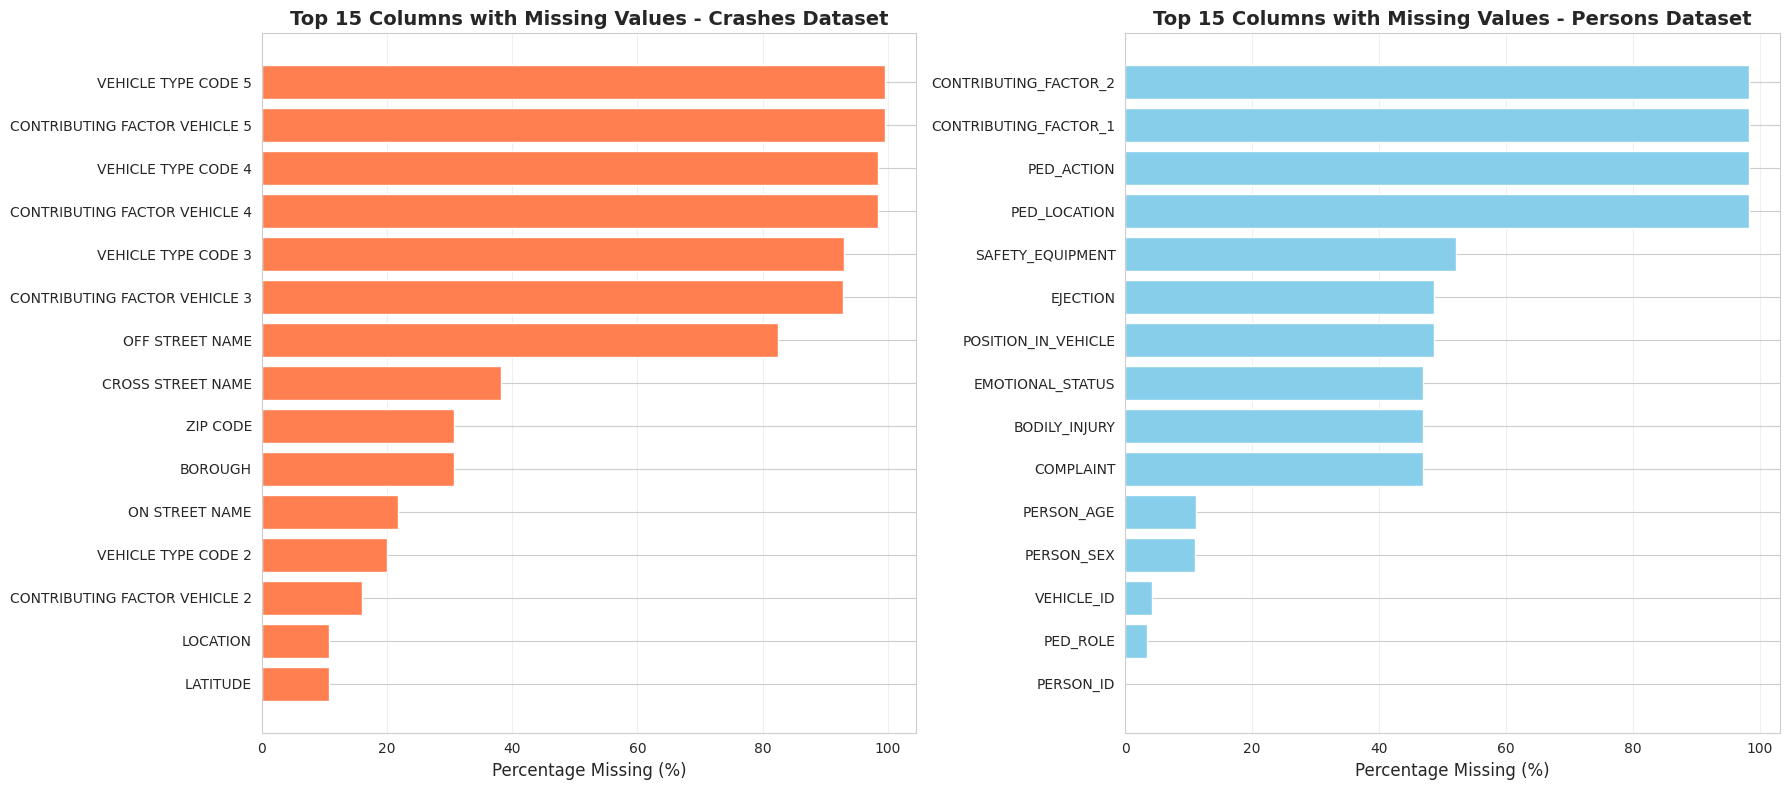

In [3]:
## ============================================================================
## SECTION 3: EXPLORATORY DATA ANALYSIS (EDA) - PERSONS DATASET
## ============================================================================

print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS - PERSONS DATASET")
print("="*80)

print("\n1. DATASET STRUCTURE")
print("-" * 80)
print(f"Number of records: {df_persons.shape[0]:,}")
print(f"Number of columns: {df_persons.shape[1]}")
print(f"\nColumn names and data types:")
print(df_persons.dtypes)

print("\n2. FIRST FEW RECORDS")
print("-" * 80)
display(df_persons.head(10))

print("\n3. MISSING VALUES ANALYSIS")
print("-" * 80)
missing_persons = df_persons.isnull().sum()
missing_pct_persons = (missing_persons / len(df_persons) * 100).round(2)
missing_df_persons = pd.DataFrame({
    'Missing_Count': missing_persons,
    'Percentage': missing_pct_persons
}).sort_values('Percentage', ascending=False)

print("Columns with missing values:")
display(missing_df_persons[missing_df_persons['Missing_Count'] > 0])

print("\n4. PERSON TYPE DISTRIBUTION")
print("-" * 80)
if 'PERSON_TYPE' in df_persons.columns:
    print(df_persons['PERSON_TYPE'].value_counts())

print("\n5. INJURY SEVERITY DISTRIBUTION")
print("-" * 80)
if 'PERSON_INJURY' in df_persons.columns:
    print(df_persons['PERSON_INJURY'].value_counts())

# Visualize missing data patterns
print("\n" + "="*80)
print("VISUALIZATION: MISSING DATA PATTERNS")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Missing values in crashes
top_missing_crashes = missing_df_crashes[missing_df_crashes['Missing_Count'] > 0].head(15)
axes[0].barh(top_missing_crashes.index, top_missing_crashes['Percentage'], color='coral')
axes[0].set_xlabel('Percentage Missing (%)', fontsize=12)
axes[0].set_title('Top 15 Columns with Missing Values - Crashes Dataset', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Missing values in persons
top_missing_persons = missing_df_persons[missing_df_persons['Missing_Count'] > 0].head(15)
axes[1].barh(top_missing_persons.index, top_missing_persons['Percentage'], color='skyblue')
axes[1].set_xlabel('Percentage Missing (%)', fontsize=12)
axes[1].set_title('Top 15 Columns with Missing Values - Persons Dataset', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


In [4]:
## ============================================================================
## SECTION 4: PRE-INTEGRATION CLEANING - CRASHES DATASET
## ============================================================================

print("\n" + "="*80)
print("PRE-INTEGRATION CLEANING - CRASHES DATASET")
print("="*80)

# Create a copy for cleaning
df_crashes_clean = df_crashes.copy()

print("\n STEP 1: HANDLING DATE/TIME COLUMNS")
print("-" * 80)
print("Converting date and time strings to proper datetime format...")

# Convert CRASH DATE to datetime
df_crashes_clean['CRASH DATE'] = pd.to_datetime(df_crashes_clean['CRASH DATE'], errors='coerce')

# Convert CRASH TIME to time object
df_crashes_clean['CRASH TIME'] = pd.to_datetime(df_crashes_clean['CRASH TIME'], format='%H:%M', errors='coerce').dt.time

# Create a combined datetime column for easier analysis
df_crashes_clean['CRASH_DATETIME'] = pd.to_datetime(
    df_crashes_clean['CRASH DATE'].astype(str) + ' ' + df_crashes_clean['CRASH TIME'].astype(str),
    errors='coerce'
)

# Extract temporal features for analysis
df_crashes_clean['YEAR'] = df_crashes_clean['CRASH DATE'].dt.year
df_crashes_clean['MONTH'] = df_crashes_clean['CRASH DATE'].dt.month
df_crashes_clean['DAY_OF_WEEK'] = df_crashes_clean['CRASH DATE'].dt.dayofweek  # 0=Monday, 6=Sunday
df_crashes_clean['HOUR'] = df_crashes_clean['CRASH_DATETIME'].dt.hour

# Check for invalid dates
invalid_dates = df_crashes_clean['CRASH DATE'].isnull().sum()
print(f"Date/Time columns processed")
print(f"   Date range: {df_crashes_clean['CRASH DATE'].min()} to {df_crashes_clean['CRASH DATE'].max()}")
print(f"   Invalid/unparseable dates: {invalid_dates}")
print(f"   New temporal columns created: YEAR, MONTH, DAY_OF_WEEK, HOUR")

print("\n STEP 2: HANDLING DUPLICATES")
print("-" * 80)
duplicates_before = df_crashes_clean.duplicated().sum()
print(f"Duplicate rows found: {duplicates_before:,}")

if duplicates_before > 0:
    # Remove exact duplicates
    df_crashes_clean = df_crashes_clean.drop_duplicates()
    print(f" Duplicates removed")
    print(f" New shape: {df_crashes_clean.shape}")
else:
    print("No duplicates found")

print("\n STEP 3: HANDLING MISSING VALUES")
print("-" * 80)
print("Strategy:")
print("- DROP: Columns with >70% missing data that aren't critical for analysis")
print("- FILL: Categorical columns with 'Unspecified'")
print("- FILL: Numerical injury/fatality columns with 0 (assuming no injury if not reported)")
print()

# Identify columns to drop (>70% missing and not critical)
columns_to_drop = missing_df_crashes[missing_df_crashes['Percentage'] > 70].index.tolist()
if columns_to_drop:
    print(f"Dropping {len(columns_to_drop)} columns with >70% missing:")
    for col in columns_to_drop:
        print(f"   - {col} ({missing_df_crashes.loc[col, 'Percentage']:.1f}% missing)")
    df_crashes_clean = df_crashes_clean.drop(columns=columns_to_drop, errors='ignore')
    print()

# Fill categorical missing values with 'Unspecified'
categorical_cols = ['BOROUGH', 'ZIP CODE', 'ON STREET NAME', 'CROSS STREET NAME', 
                   'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
                   'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']

print("Filling categorical columns with 'Unspecified':")
for col in categorical_cols:
    if col in df_crashes_clean.columns:
        missing_before = df_crashes_clean[col].isnull().sum()
        df_crashes_clean[col] = df_crashes_clean[col].fillna('Unspecified')
        print(f"  {col}: {missing_before:,} values filled")

# Fill numerical injury/fatality columns with 0
injury_cols = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
               'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
               'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
               'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']

print("\nFilling injury/fatality columns with 0:")
for col in injury_cols:
    if col in df_crashes_clean.columns:
        missing_before = df_crashes_clean[col].isnull().sum()
        df_crashes_clean[col] = df_crashes_clean[col].fillna(0).astype(int)
        print(f"  {col}: {missing_before:,} values filled")

print("\n STEP 4: DETECTING AND HANDLING OUTLIERS")
print("-" * 80)

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    """Detect outliers using Interquartile Range method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check latitude and longitude for valid NYC ranges
# Valid NYC ranges: Latitude: 40.4 to 40.95, Longitude: -74.3 to -73.7
print("Checking geographic coordinates (Latitude/Longitude)...")
print("Valid NYC ranges: Lat [40.4, 40.95], Long [-74.3, -73.7]")

if 'LATITUDE' in df_crashes_clean.columns and 'LONGITUDE' in df_crashes_clean.columns:
    invalid_coords = df_crashes_clean[
        (df_crashes_clean['LATITUDE'].notna()) & 
        (df_crashes_clean['LONGITUDE'].notna()) &
        ((df_crashes_clean['LATITUDE'] < 40.4) | (df_crashes_clean['LATITUDE'] > 40.95) |
         (df_crashes_clean['LONGITUDE'] < -74.3) | (df_crashes_clean['LONGITUDE'] > -73.7))
    ]
    print(f"   Invalid coordinates found: {len(invalid_coords):,}")
    
    if len(invalid_coords) > 0:
        print(f" Removing {len(invalid_coords):,} records with invalid coordinates")
        df_crashes_clean = df_crashes_clean[
            (df_crashes_clean['LATITUDE'].isna()) | 
            (df_crashes_clean['LONGITUDE'].isna()) |
            ((df_crashes_clean['LATITUDE'] >= 40.4) & (df_crashes_clean['LATITUDE'] <= 40.95) &
             (df_crashes_clean['LONGITUDE'] >= -74.3) & (df_crashes_clean['LONGITUDE'] <= -73.7))
        ]

# Check for unreasonable injury/fatality counts
print("\nChecking for outliers in injury/fatality columns:")
for col in injury_cols:
    if col in df_crashes_clean.columns:
        non_zero = df_crashes_clean[df_crashes_clean[col] > 0]
        if len(non_zero) > 0:
            outliers, lower, upper = detect_outliers_iqr(non_zero, col)
            max_val = df_crashes_clean[col].max()
            print(f"   {col}: Max={max_val}, Outlier threshold={upper:.0f}, Count={len(outliers)}")

print("\n STEP 5: STANDARDIZING DATA FORMATS")
print("-" * 80)
print("Standardizing text columns (uppercase, strip whitespace)...")

# Standardize text columns
text_cols = ['BOROUGH', 'ON STREET NAME', 'CROSS STREET NAME', 
             'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
             'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']

for col in text_cols:
    if col in df_crashes_clean.columns:
        df_crashes_clean[col] = df_crashes_clean[col].astype(str).str.strip().str.upper()
        print(f" Standardized: {col}")

print(f"\n PRE-INTEGRATION CLEANING COMPLETE (CRASHES DATASET)")
print(f"   Original shape: {df_crashes.shape}")
print(f"   Cleaned shape: {df_crashes_clean.shape}")
print(f"   Records removed: {df_crashes.shape[0] - df_crashes_clean.shape[0]:,}")
print(f"   Columns removed: {df_crashes.shape[1] - df_crashes_clean.shape[1]}")


PRE-INTEGRATION CLEANING - CRASHES DATASET

 STEP 1: HANDLING DATE/TIME COLUMNS
--------------------------------------------------------------------------------
Converting date and time strings to proper datetime format...
Date/Time columns processed
   Date range: 2012-07-01 00:00:00 to 2025-11-16 00:00:00
   Invalid/unparseable dates: 0
   New temporal columns created: YEAR, MONTH, DAY_OF_WEEK, HOUR

 STEP 2: HANDLING DUPLICATES
--------------------------------------------------------------------------------
Duplicate rows found: 0
No duplicates found

 STEP 3: HANDLING MISSING VALUES
--------------------------------------------------------------------------------
Strategy:
- DROP: Columns with >70% missing data that aren't critical for analysis
- FILL: Categorical columns with 'Unspecified'
- FILL: Numerical injury/fatality columns with 0 (assuming no injury if not reported)

Dropping 7 columns with >70% missing:
   - VEHICLE TYPE CODE 5 (99.6% missing)
   - CONTRIBUTING FACTOR VEH

In [5]:
## ============================================================================
## SECTION 5: PRE-INTEGRATION CLEANING - PERSONS DATASET
## ============================================================================

print("\n" + "="*80)
print("PRE-INTEGRATION CLEANING - PERSONS DATASET")
print("="*80)

# Create a copy for cleaning
df_persons_clean = df_persons.copy()

print("\n STEP 1: HANDLING DUPLICATES")
print("-" * 80)
duplicates_persons = df_persons_clean.duplicated().sum()
print(f"Duplicate rows found: {duplicates_persons:,}")

if duplicates_persons > 0:
    df_persons_clean = df_persons_clean.drop_duplicates()
    print(f" Duplicates removed")
    print(f"   New shape: {df_persons_clean.shape}")
else:
    print(" No duplicates found")

print("\n STEP 2: HANDLING MISSING VALUES")
print("-" * 80)
print("Filling categorical columns with 'Unknown':")

# Fill categorical columns with 'Unknown'
person_categorical_cols = ['PERSON_TYPE', 'PERSON_INJURY', 'PERSON_SEX', 
                          'PERSON_AGE', 'SAFETY_EQUIPMENT', 'COMPLAINT']

for col in person_categorical_cols:
    if col in df_persons_clean.columns:
        missing_before = df_persons_clean[col].isnull().sum()
        df_persons_clean[col] = df_persons_clean[col].fillna('Unknown')
        print(f"  {col}: {missing_before:,} values filled")

print("\n STEP 3: STANDARDIZING DATA FORMATS")
print("-" * 80)
print("Standardizing text columns (uppercase, strip whitespace)...")

# Standardize text columns
for col in person_categorical_cols:
    if col in df_persons_clean.columns and df_persons_clean[col].dtype == 'object':
        df_persons_clean[col] = df_persons_clean[col].astype(str).str.strip().str.upper()
        print(f" Standardized: {col}")

print(f"\n PRE-INTEGRATION CLEANING COMPLETE (PERSONS DATASET)")
print(f"   Original shape: {df_persons.shape}")
print(f"   Cleaned shape: {df_persons_clean.shape}")
print(f"   Records removed: {df_persons.shape[0] - df_persons_clean.shape[0]:,}")


PRE-INTEGRATION CLEANING - PERSONS DATASET

 STEP 1: HANDLING DUPLICATES
--------------------------------------------------------------------------------
Duplicate rows found: 0
 No duplicates found

 STEP 2: HANDLING MISSING VALUES
--------------------------------------------------------------------------------
Filling categorical columns with 'Unknown':
  PERSON_TYPE: 0 values filled
  PERSON_INJURY: 0 values filled
  PERSON_SEX: 643,831 values filled
  PERSON_AGE: 650,573 values filled
  SAFETY_EQUIPMENT: 3,032,359 values filled
  COMPLAINT: 2,732,154 values filled

 STEP 3: STANDARDIZING DATA FORMATS
--------------------------------------------------------------------------------
Standardizing text columns (uppercase, strip whitespace)...
 Standardized: PERSON_TYPE
 Standardized: PERSON_INJURY
 Standardized: PERSON_SEX
 Standardized: PERSON_AGE
 Standardized: SAFETY_EQUIPMENT
 Standardized: COMPLAINT

 PRE-INTEGRATION CLEANING COMPLETE (PERSONS DATASET)
   Original shape: (5823480

In [6]:
## ============================================================================
## SECTION 6: DATA INTEGRATION
## ============================================================================

print("\n" + "="*80)
print("DATA INTEGRATION - JOINING CRASHES AND PERSONS DATASETS")
print("="*80)

print("\n STEP 1: CHECKING COMMON KEYS")
print("-" * 80)
crashes_unique_ids = df_crashes_clean['COLLISION_ID'].nunique()
persons_unique_ids = df_persons_clean['COLLISION_ID'].nunique()

print(f"Unique COLLISION_ID in crashes: {crashes_unique_ids:,}")
print(f"Unique COLLISION_ID in persons: {persons_unique_ids:,}")

# Check for collision IDs in persons but not in crashes
crash_ids = set(df_crashes_clean['COLLISION_ID'])
person_ids = set(df_persons_clean['COLLISION_ID'])

missing_in_crashes = person_ids - crash_ids
missing_in_persons = crash_ids - person_ids

print(f"\nCollision IDs in persons but NOT in crashes: {len(missing_in_crashes):,}")
print(f"Collision IDs in crashes but NOT in persons: {len(missing_in_persons):,}")
print(f"Common collision IDs: {len(crash_ids & person_ids):,}")

print("\n🔗 STEP 2: PERFORMING LEFT JOIN")
print("-" * 80)
print("Join Strategy: LEFT JOIN")
print("- Keep ALL crash records from crashes dataset")
print("- Add person-level details from persons dataset where available")
print("- Allows analysis at both crash-level and person-level")
print()

# Perform the join
print("Executing join on COLLISION_ID...")
df_integrated = df_crashes_clean.merge(
    df_persons_clean,
    on='COLLISION_ID',
    how='left',
    suffixes=('_crash', '_person'),
    indicator=True  # Track merge results
)

# Analyze merge results
merge_stats = df_integrated['_merge'].value_counts()
print(f"\nMerge Results:")
print(f"   Both (matched): {merge_stats.get('both', 0):,}")
print(f"   Left only (crashes without persons): {merge_stats.get('left_only', 0):,}")
print(f"   Right only: {merge_stats.get('right_only', 0):,}")

# Drop the merge indicator
df_integrated = df_integrated.drop('_merge', axis=1)

print(f"\n INTEGRATION COMPLETE")
print(f"   Original crashes: {df_crashes_clean.shape[0]:,}")
print(f"   Integrated records: {df_integrated.shape[0]:,}")
print(f"   Average persons per crash: {df_integrated.shape[0] / df_crashes_clean.shape[0]:.2f}")
print(f"   Total columns: {df_integrated.shape[1]}")



DATA INTEGRATION - JOINING CRASHES AND PERSONS DATASETS

 STEP 1: CHECKING COMMON KEYS
--------------------------------------------------------------------------------
Unique COLLISION_ID in crashes: 2,214,868
Unique COLLISION_ID in persons: 1,591,547

Collision IDs in persons but NOT in crashes: 6,656
Collision IDs in crashes but NOT in persons: 629,977
Common collision IDs: 1,584,891

🔗 STEP 2: PERFORMING LEFT JOIN
--------------------------------------------------------------------------------
Join Strategy: LEFT JOIN
- Keep ALL crash records from crashes dataset
- Add person-level details from persons dataset where available
- Allows analysis at both crash-level and person-level

Executing join on COLLISION_ID...

Merge Results:
   Both (matched): 5,801,108
   Left only (crashes without persons): 629,977
   Right only: 0

 INTEGRATION COMPLETE
   Original crashes: 2,214,868
   Integrated records: 6,431,085
   Average persons per crash: 2.90
   Total columns: 47


In [7]:
## ============================================================================
## SECTION 7: POST-INTEGRATION CLEANING
## ============================================================================

print("\n" + "="*80)
print("POST-INTEGRATION CLEANING")
print("="*80)

print("\n STEP 1: HANDLING NEW MISSING VALUES FROM JOIN")
print("-" * 80)

# Check for new missing values after integration
new_missing = df_integrated.isnull().sum()
new_missing_pct = (new_missing / len(df_integrated) * 100).round(2)
new_missing_df = pd.DataFrame({
    'Missing_Count': new_missing,
    'Percentage': new_missing_pct
}).sort_values('Percentage', ascending=False)

print("Top 20 columns with missing values after integration:")
display(new_missing_df[new_missing_df['Missing_Count'] > 0].head(20))

# Fill person-related missing values (for crashes with no person records)
person_cols_to_fill = ['PERSON_TYPE', 'PERSON_INJURY', 'PERSON_SEX', 'PERSON_AGE']
print("\nFilling person-related columns (for crashes without person records):")
for col in person_cols_to_fill:
    if col in df_integrated.columns:
        missing_before = df_integrated[col].isnull().sum()
        df_integrated[col] = df_integrated[col].fillna('No Person Record')
        print(f"  {col}: {missing_before:,} values filled with 'No Person Record'")

print("\n🗂️ STEP 2: RESOLVING DUPLICATE/REDUNDANT COLUMNS")
print("-" * 80)

# Identify columns with _crash and _person suffixes
crash_cols = [col for col in df_integrated.columns if col.endswith('_crash')]
person_cols = [col for col in df_integrated.columns if col.endswith('_person')]

print(f"Columns with _crash suffix: {len(crash_cols)}")
if crash_cols:
    print(f"   {crash_cols[:5]}...")  # Show first 5

print(f"Columns with _person suffix: {len(person_cols)}")
if person_cols:
    print(f"   {person_cols[:5]}...")  # Show first 5

print("\nNote: Keeping both versions for potential analysis needs")
print("User can drop redundant columns based on specific analysis requirements")

print("\n STEP 3: DATA TYPE VALIDATION")
print("-" * 80)

# Ensure proper data types for key columns
numeric_cols = ['LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 
                'NUMBER OF PERSONS KILLED', 'YEAR', 'MONTH', 'HOUR']

print("Validating numeric columns:")
for col in numeric_cols:
    if col in df_integrated.columns:
        df_integrated[col] = pd.to_numeric(df_integrated[col], errors='coerce')
        print(f"  {col} validated as numeric")

# Convert COLLISION_ID to integer if possible
if 'COLLISION_ID' in df_integrated.columns:
    df_integrated['COLLISION_ID'] = pd.to_numeric(df_integrated['COLLISION_ID'], errors='coerce').astype('Int64')
    print(f"  COLLISION_ID validated as integer")

print(f"\n POST-INTEGRATION CLEANING COMPLETE")
print(f"   Final integrated dataset shape: {df_integrated.shape}")
print(f"   Total columns: {df_integrated.shape[1]}")
print(f"   Total records: {df_integrated.shape[0]:,}")


POST-INTEGRATION CLEANING

 STEP 1: HANDLING NEW MISSING VALUES FROM JOIN
--------------------------------------------------------------------------------
Top 20 columns with missing values after integration:


,Missing_Count,Percentage
CONTRIBUTING_FACTOR_2,6330751,98.44
CONTRIBUTING_FACTOR_1,6330619,98.44
PED_LOCATION,6329238,98.42
PED_ACTION,6329339,98.42
EJECTION,3448279,53.62
POSITION_IN_VEHICLE,3447826,53.61
EMOTIONAL_STATUS,3351765,52.12
BODILY_INJURY,3351722,52.12
VEHICLE_ID,870414,13.53
PED_ROLE,824866,12.83



Filling person-related columns (for crashes without person records):
  PERSON_TYPE: 629,977 values filled with 'No Person Record'
  PERSON_INJURY: 629,977 values filled with 'No Person Record'
  PERSON_SEX: 629,977 values filled with 'No Person Record'
  PERSON_AGE: 629,977 values filled with 'No Person Record'

🗂️ STEP 2: RESOLVING DUPLICATE/REDUNDANT COLUMNS
--------------------------------------------------------------------------------
Columns with _crash suffix: 0
Columns with _person suffix: 0

Note: Keeping both versions for potential analysis needs
User can drop redundant columns based on specific analysis requirements

 STEP 3: DATA TYPE VALIDATION
--------------------------------------------------------------------------------
Validating numeric columns:
  LATITUDE validated as numeric
  LONGITUDE validated as numeric
  NUMBER OF PERSONS INJURED validated as numeric
  NUMBER OF PERSONS KILLED validated as numeric
  YEAR validated as numeric
  MONTH validated as numeric
  HOU


DATA QUALITY VALIDATION & KEY INSIGHTS


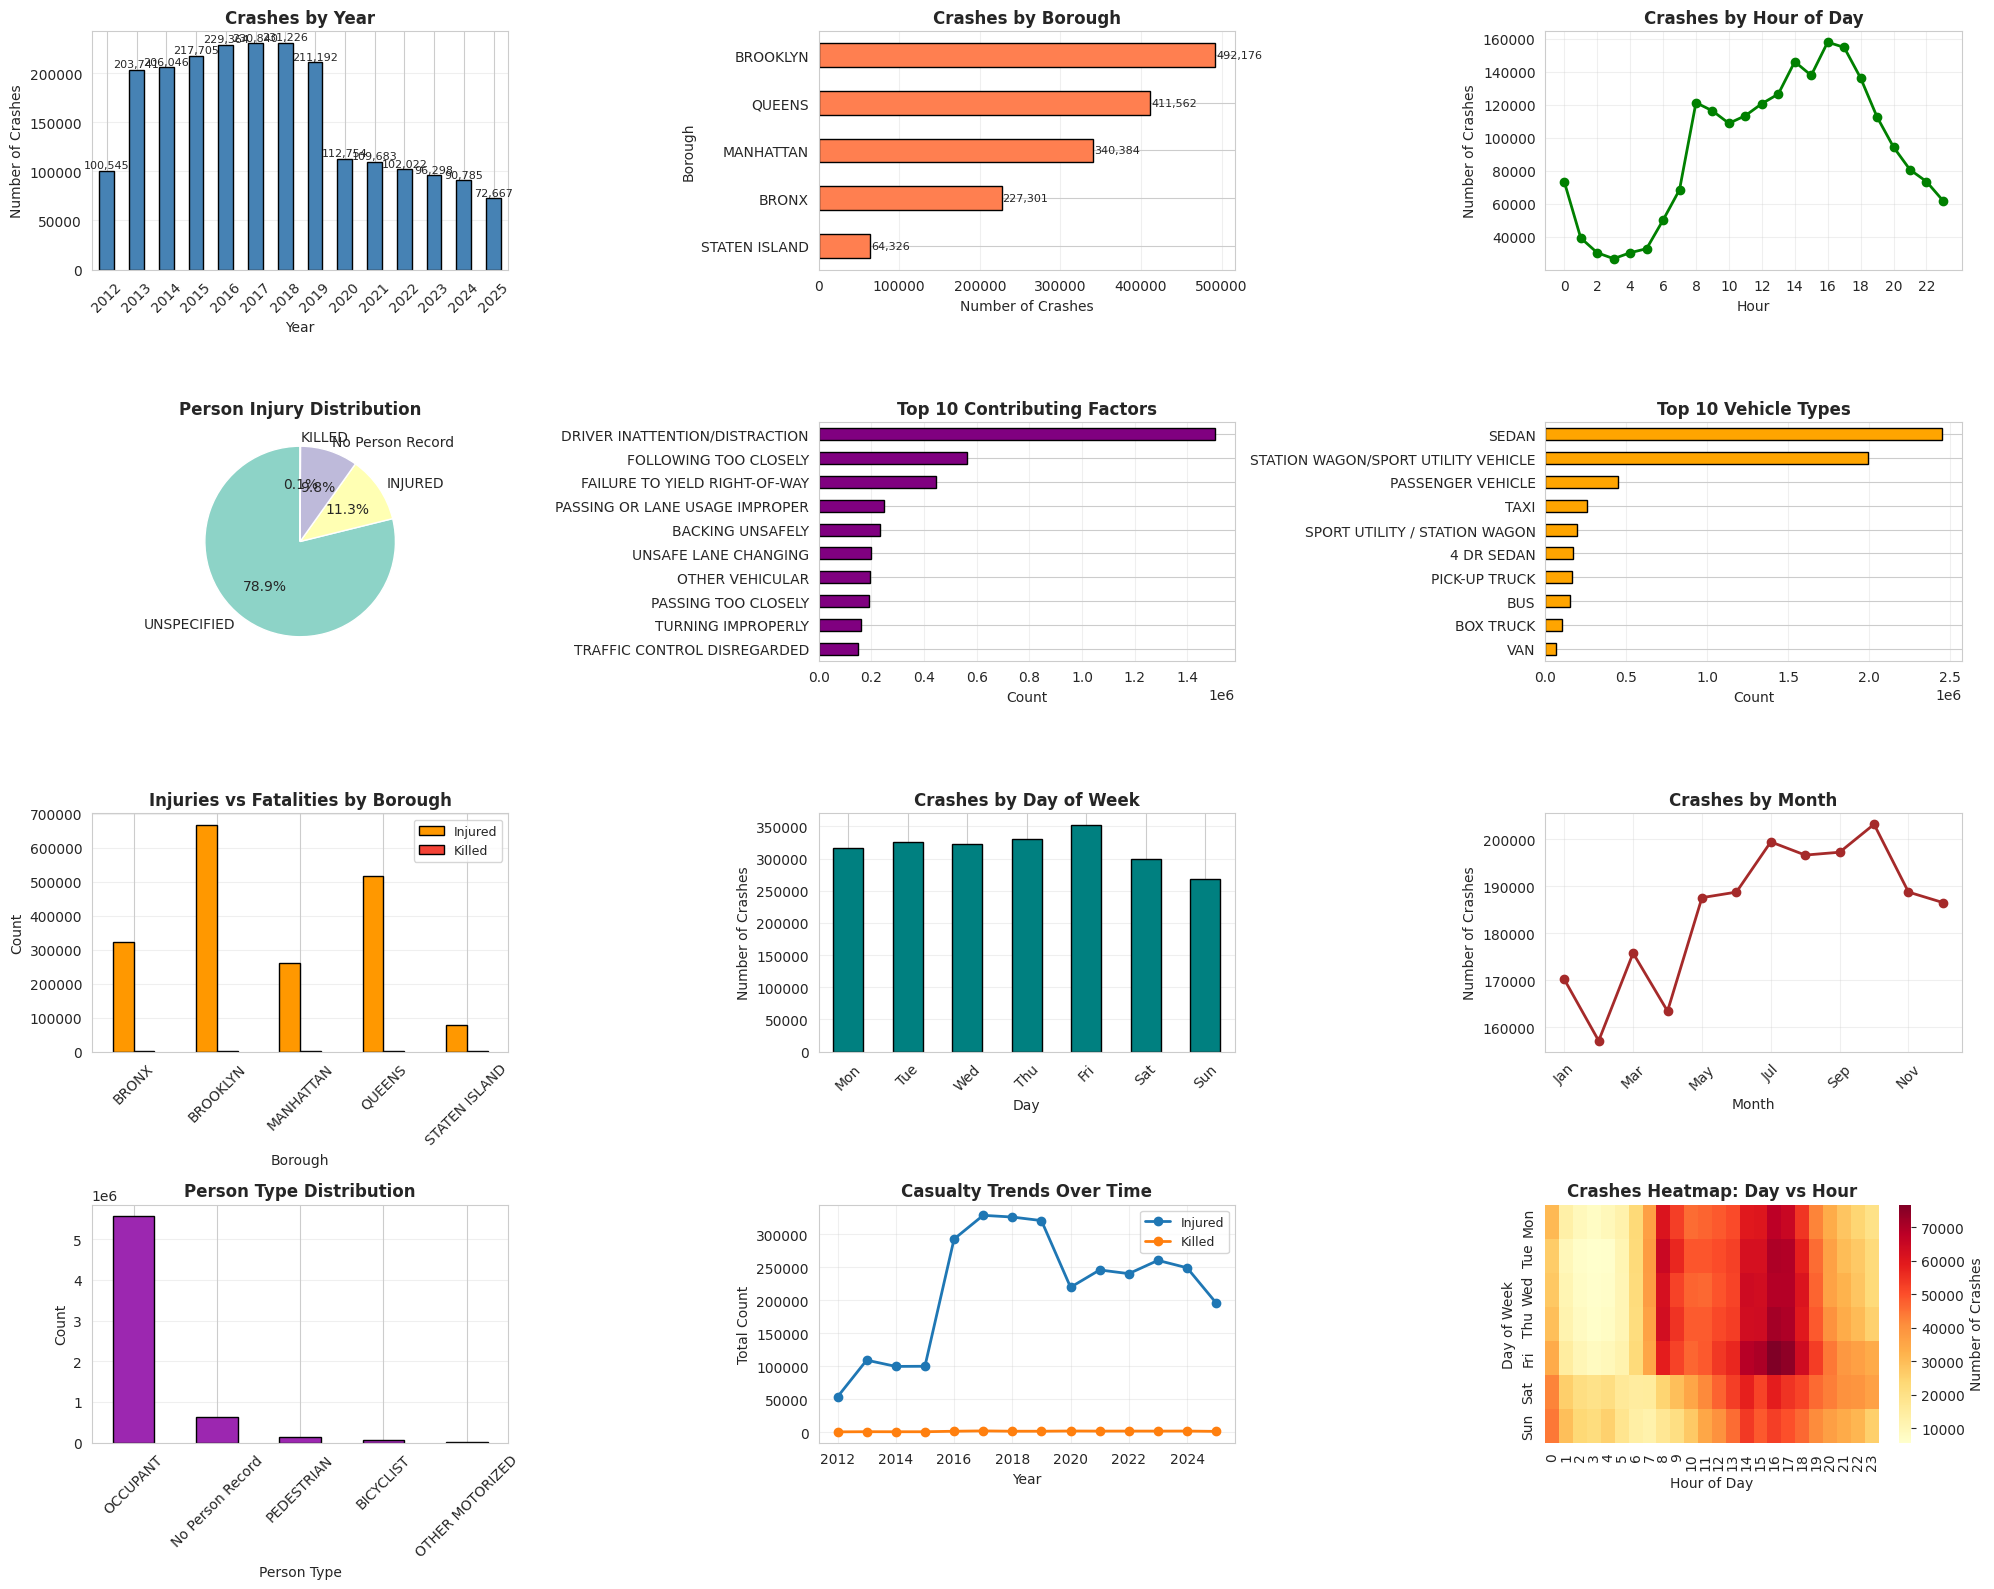


 All visualizations generated successfully!


In [8]:


## ============================================================================
## SECTION 8: DATA QUALITY VALIDATION & VISUALIZATIONS
## ============================================================================

print("\n" + "="*80)
print("DATA QUALITY VALIDATION & KEY INSIGHTS")
print("="*80)

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 16))

# 1. Crashes by Year
ax1 = plt.subplot(4, 3, 1)
crashes_by_year = df_integrated.groupby('YEAR')['COLLISION_ID'].nunique().sort_index()
crashes_by_year.plot(kind='bar', color='steelblue', ax=ax1, edgecolor='black')
ax1.set_title('Crashes by Year', fontweight='bold', fontsize=12)
ax1.set_xlabel('Year', fontsize=10)
ax1.set_ylabel('Number of Crashes', fontsize=10)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(crashes_by_year.values):
    ax1.text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontsize=8)

# 2. Crashes by Borough
ax2 = plt.subplot(4, 3, 2)
borough_crashes = df_integrated[df_integrated['BOROUGH'] != 'UNSPECIFIED'].groupby('BOROUGH')['COLLISION_ID'].nunique().sort_values(ascending=True)
borough_crashes.plot(kind='barh', color='coral', ax=ax2, edgecolor='black')
ax2.set_title('Crashes by Borough', fontweight='bold', fontsize=12)
ax2.set_xlabel('Number of Crashes', fontsize=10)
ax2.set_ylabel('Borough', fontsize=10)
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(borough_crashes.values):
    ax2.text(v + 1000, i, f'{v:,}', ha='left', va='center', fontsize=8)

# 3. Crashes by Hour of Day
ax3 = plt.subplot(4, 3, 3)
hour_crashes = df_integrated.groupby('HOUR')['COLLISION_ID'].nunique()
hour_crashes.plot(kind='line', marker='o', color='green', ax=ax3, linewidth=2, markersize=6)
ax3.set_title('Crashes by Hour of Day', fontweight='bold', fontsize=12)
ax3.set_xlabel('Hour', fontsize=10)
ax3.set_ylabel('Number of Crashes', fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.set_xticks(range(0, 24, 2))

# 4. Injury Severity Distribution (Pie Chart)
ax4 = plt.subplot(4, 3, 4)
if 'PERSON_INJURY' in df_integrated.columns:
    injury_dist = df_integrated[~df_integrated['PERSON_INJURY'].isin(['UNKNOWN', 'NO PERSON RECORD'])]['PERSON_INJURY'].value_counts().head(6)
    colors = plt.cm.Set3(range(len(injury_dist)))
    ax4.pie(injury_dist.values, labels=injury_dist.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax4.set_title('Person Injury Distribution', fontweight='bold', fontsize=12)

# 5. Top 10 Contributing Factors
ax5 = plt.subplot(4, 3, 5)
top_factors = df_integrated[df_integrated['CONTRIBUTING FACTOR VEHICLE 1'] != 'UNSPECIFIED']['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)
top_factors.plot(kind='barh', color='purple', ax=ax5, edgecolor='black')
ax5.set_title('Top 10 Contributing Factors', fontweight='bold', fontsize=12)
ax5.set_xlabel('Count', fontsize=10)
ax5.set_ylabel('')
ax5.invert_yaxis()
ax5.grid(axis='x', alpha=0.3)

# 6. Top 10 Vehicle Types
ax6 = plt.subplot(4, 3, 6)
top_vehicles = df_integrated[df_integrated['VEHICLE TYPE CODE 1'] != 'UNSPECIFIED']['VEHICLE TYPE CODE 1'].value_counts().head(10)
top_vehicles.plot(kind='barh', color='orange', ax=ax6, edgecolor='black')
ax6.set_title('Top 10 Vehicle Types', fontweight='bold', fontsize=12)
ax6.set_xlabel('Count', fontsize=10)
ax6.set_ylabel('')
ax6.invert_yaxis()
ax6.grid(axis='x', alpha=0.3)

# 7. Injuries vs Fatalities by Borough
ax7 = plt.subplot(4, 3, 7)
borough_casualties = df_integrated[df_integrated['BOROUGH'] != 'UNSPECIFIED'].groupby('BOROUGH')[
    ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']
].sum()
borough_casualties.plot(kind='bar', ax=ax7, color=['#FF9800', '#F44336'], edgecolor='black')
ax7.set_title('Injuries vs Fatalities by Borough', fontweight='bold', fontsize=12)
ax7.set_xlabel('Borough', fontsize=10)
ax7.set_ylabel('Count', fontsize=10)
ax7.legend(['Injured', 'Killed'], fontsize=9)
ax7.tick_params(axis='x', rotation=45)
ax7.grid(axis='y', alpha=0.3)

# 8. Crashes by Day of Week
ax8 = plt.subplot(4, 3, 8)
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_crashes = df_integrated.groupby('DAY_OF_WEEK')['COLLISION_ID'].nunique()
day_crashes.index = [day_names[i] for i in day_crashes.index]
day_crashes.plot(kind='bar', color='teal', ax=ax8, edgecolor='black')
ax8.set_title('Crashes by Day of Week', fontweight='bold', fontsize=12)
ax8.set_xlabel('Day', fontsize=10)
ax8.set_ylabel('Number of Crashes', fontsize=10)
ax8.tick_params(axis='x', rotation=45)
ax8.grid(axis='y', alpha=0.3)

# 9. Monthly Trend
ax9 = plt.subplot(4, 3, 9)
month_crashes = df_integrated.groupby('MONTH')['COLLISION_ID'].nunique()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_crashes.index = [month_names[i-1] for i in month_crashes.index]
month_crashes.plot(kind='line', marker='o', color='brown', ax=ax9, linewidth=2, markersize=6)
ax9.set_title('Crashes by Month', fontweight='bold', fontsize=12)
ax9.set_xlabel('Month', fontsize=10)
ax9.set_ylabel('Number of Crashes', fontsize=10)
ax9.grid(True, alpha=0.3)
ax9.tick_params(axis='x', rotation=45)

# 10. Person Type Distribution
ax10 = plt.subplot(4, 3, 10)
if 'PERSON_TYPE' in df_integrated.columns:
    person_type_dist = df_integrated[df_integrated['PERSON_TYPE'] != 'NO PERSON RECORD']['PERSON_TYPE'].value_counts().head(6)
    person_type_dist.plot(kind='bar', color='#9C27B0', ax=ax10, edgecolor='black')
    ax10.set_title('Person Type Distribution', fontweight='bold', fontsize=12)
    ax10.set_xlabel('Person Type', fontsize=10)
    ax10.set_ylabel('Count', fontsize=10)
    ax10.tick_params(axis='x', rotation=45)
    ax10.grid(axis='y', alpha=0.3)

# 11. Casualty Trends Over Time
ax11 = plt.subplot(4, 3, 11)
yearly_casualties = df_integrated.groupby('YEAR')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()
yearly_casualties.plot(kind='line', marker='o', ax=ax11, linewidth=2, markersize=6)
ax11.set_title('Casualty Trends Over Time', fontweight='bold', fontsize=12)
ax11.set_xlabel('Year', fontsize=10)
ax11.set_ylabel('Total Count', fontsize=10)
ax11.legend(['Injured', 'Killed'], fontsize=9)
ax11.grid(True, alpha=0.3)

# 12. Heatmap: Crashes by Day and Hour
ax12 = plt.subplot(4, 3, 12)
heatmap_data = df_integrated.groupby(['DAY_OF_WEEK', 'HOUR']).size().unstack(fill_value=0)
heatmap_data.index = [day_names[i] for i in heatmap_data.index]
sns.heatmap(heatmap_data, cmap='YlOrRd', ax=ax12, cbar_kws={'label': 'Number of Crashes'})
ax12.set_title('Crashes Heatmap: Day vs Hour', fontweight='bold', fontsize=12)
ax12.set_xlabel('Hour of Day', fontsize=10)
ax12.set_ylabel('Day of Week', fontsize=10)

plt.tight_layout()
plt.show()

print("\n All visualizations generated successfully!")


In [9]:
## ============================================================================
## SECTION 9: STATISTICAL SUMMARY & KEY INSIGHTS
## ============================================================================

print("\n" + "="*80)
print("STATISTICAL SUMMARY & KEY INSIGHTS")
print("="*80)

# Calculate key statistics
total_unique_crashes = df_integrated['COLLISION_ID'].nunique()
total_persons = df_integrated.shape[0]
total_injuries = df_integrated['NUMBER OF PERSONS INJURED'].sum()
total_fatalities = df_integrated['NUMBER OF PERSONS KILLED'].sum()
date_range_start = df_integrated['CRASH DATE'].min()
date_range_end = df_integrated['CRASH DATE'].max()
total_days = (date_range_end - date_range_start).days

print("\n OVERALL STATISTICS")
print("-" * 80)
print(f"Total Unique Crashes: {total_unique_crashes:,}")
print(f"Total Person Records: {total_persons:,}")
print(f"Average Persons per Crash: {total_persons / total_unique_crashes:.2f}")
print(f"Date Range: {date_range_start.date()} to {date_range_end.date()}")
print(f"Time Period: {total_days:,} days ({total_days/365:.1f} years)")
print(f"Average Crashes per Day: {total_unique_crashes / total_days:.1f}")

print("\n CASUALTY STATISTICS")
print("-" * 80)
print(f"Total Injuries: {int(total_injuries):,}")
print(f"Total Fatalities: {int(total_fatalities):,}")
print(f"Total Casualties: {int(total_injuries + total_fatalities):,}")
print(f"Fatality Rate: {(total_fatalities / total_unique_crashes * 100):.3f}% of crashes")
print(f"Injury Rate: {(total_injuries / total_unique_crashes * 100):.2f}% of crashes")

# Borough-specific statistics
print("\n BOROUGH-SPECIFIC STATISTICS")
print("-" * 80)
borough_stats = df_integrated[df_integrated['BOROUGH'] != 'UNSPECIFIED'].groupby('BOROUGH').agg({
    'COLLISION_ID': 'nunique',
    'NUMBER OF PERSONS INJURED': 'sum',
    'NUMBER OF PERSONS KILLED': 'sum'
}).sort_values('COLLISION_ID', ascending=False)

borough_stats.columns = ['Total_Crashes', 'Total_Injured', 'Total_Killed']
borough_stats['Injury_Rate'] = (borough_stats['Total_Injured'] / borough_stats['Total_Crashes']).round(2)
borough_stats['Fatality_Rate'] = (borough_stats['Total_Killed'] / borough_stats['Total_Crashes'] * 100).round(3)

display(borough_stats)

# Top contributing factors
print("\n TOP CONTRIBUTING FACTORS")
print("-" * 80)
top_factors_stats = df_integrated[df_integrated['CONTRIBUTING FACTOR VEHICLE 1'] != 'UNSPECIFIED']['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)
for i, (factor, count) in enumerate(top_factors_stats.items(), 1):
    pct = (count / total_unique_crashes * 100)
    print(f"{i:2d}. {factor:.<50} {count:>8,} ({pct:>5.2f}%)")

# Top vehicle types
print("\n TOP VEHICLE TYPES INVOLVED")
print("-" * 80)
top_vehicles_stats = df_integrated[df_integrated['VEHICLE TYPE CODE 1'] != 'UNSPECIFIED']['VEHICLE TYPE CODE 1'].value_counts().head(10)
for i, (vehicle, count) in enumerate(top_vehicles_stats.items(), 1):
    pct = (count / total_persons * 100)
    print(f"{i:2d}. {vehicle:.<50} {count:>8,} ({pct:>5.2f}%)")

# Temporal patterns
print("\n TEMPORAL PATTERNS")
print("-" * 80)

# Peak hour
peak_hour_data = df_integrated.groupby('HOUR')['COLLISION_ID'].nunique()
peak_hour = peak_hour_data.idxmax()
peak_hour_crashes = peak_hour_data.max()
print(f"Peak Crash Hour: {peak_hour}:00 with {peak_hour_crashes:,} crashes")

# Peak day
peak_day_data = df_integrated.groupby('DAY_OF_WEEK')['COLLISION_ID'].nunique()
peak_day_idx = peak_day_data.idxmax()
peak_day_crashes = peak_day_data.max()
day_names_full = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(f"Peak Crash Day: {day_names_full[peak_day_idx]} with {peak_day_crashes:,} crashes")

# Peak month
peak_month_data = df_integrated.groupby('MONTH')['COLLISION_ID'].nunique()
peak_month_idx = peak_month_data.idxmax()
peak_month_crashes = peak_month_data.max()
month_names_full = ['January', 'February', 'March', 'April', 'May', 'June', 
                    'July', 'August', 'September', 'October', 'November', 'December']
print(f"Peak Crash Month: {month_names_full[peak_month_idx-1]} with {peak_month_crashes:,} crashes")

# Yearly trend
yearly_trend = df_integrated.groupby('YEAR')['COLLISION_ID'].nunique()
if len(yearly_trend) > 1:
    first_year_crashes = yearly_trend.iloc[0]
    last_year_crashes = yearly_trend.iloc[-1]
    pct_change = ((last_year_crashes - first_year_crashes) / first_year_crashes * 100)
    trend = "increased" if pct_change > 0 else "decreased"
    print(f"\nYearly Trend: Crashes have {trend} by {abs(pct_change):.1f}%")
    print(f"  {yearly_trend.index[0]}: {first_year_crashes:,} crashes")
    print(f"  {yearly_trend.index[-1]}: {last_year_crashes:,} crashes")

# Person injury analysis
print("\n PERSON INJURY ANALYSIS")
print("-" * 80)
if 'PERSON_INJURY' in df_integrated.columns:
    injury_stats = df_integrated[df_integrated['PERSON_INJURY'] != 'NO PERSON RECORD']['PERSON_INJURY'].value_counts()
    print("Injury Severity Distribution:")
    for injury_type, count in injury_stats.items():
        pct = (count / injury_stats.sum() * 100)
        print(f"  {injury_type:.<50} {count:>8,} ({pct:>5.2f}%)")


STATISTICAL SUMMARY & KEY INSIGHTS

 OVERALL STATISTICS
--------------------------------------------------------------------------------
Total Unique Crashes: 2,214,868
Total Person Records: 6,431,085
Average Persons per Crash: 2.90
Date Range: 2012-07-01 to 2025-11-16
Time Period: 4,886 days (13.4 years)
Average Crashes per Day: 453.3

 CASUALTY STATISTICS
--------------------------------------------------------------------------------
Total Injuries: 3,040,437
Total Fatalities: 15,056
Total Casualties: 3,055,493
Fatality Rate: 0.680% of crashes
Injury Rate: 137.27% of crashes

 BOROUGH-SPECIFIC STATISTICS
--------------------------------------------------------------------------------


,Total_Crashes,Total_Injured,Total_Killed,Injury_Rate,Fatality_Rate
BOROUGH,,,,,
BROOKLYN,492176,667447,2881,1.36,0.585
QUEENS,411562,516861,2330,1.26,0.566
MANHATTAN,340384,259802,1673,0.76,0.492
BRONX,227301,321762,1224,1.42,0.538
STATEN ISLAND,64326,79699,404,1.24,0.628



 TOP CONTRIBUTING FACTORS
--------------------------------------------------------------------------------
 1. DRIVER INATTENTION/DISTRACTION.................... 1,506,011 (68.00%)
 2. FOLLOWING TOO CLOSELY.............................  563,081 (25.42%)
 3. FAILURE TO YIELD RIGHT-OF-WAY.....................  445,984 (20.14%)
 4. PASSING OR LANE USAGE IMPROPER....................  247,716 (11.18%)
 5. BACKING UNSAFELY..................................  234,473 (10.59%)
 6. UNSAFE LANE CHANGING..............................  198,895 ( 8.98%)
 7. OTHER VEHICULAR...................................  195,903 ( 8.84%)
 8. PASSING TOO CLOSELY...............................  192,206 ( 8.68%)
 9. TURNING IMPROPERLY................................  161,674 ( 7.30%)
10. TRAFFIC CONTROL DISREGARDED.......................  147,913 ( 6.68%)

 TOP VEHICLE TYPES INVOLVED
--------------------------------------------------------------------------------
 1. SEDAN..........................................

In [10]:

## ============================================================================
## SECTION 10: DATA QUALITY REPORT
## ============================================================================

print("\n" + "="*80)
print("DATA QUALITY REPORT")
print("="*80)

print("\n COMPLETENESS")
print("-" * 80)
total_cells = df_integrated.shape[0] * df_integrated.shape[1]
missing_cells = df_integrated.isnull().sum().sum()
completeness_pct = ((total_cells - missing_cells) / total_cells * 100)
print(f"Total Cells: {total_cells:,}")
print(f"Missing Cells: {missing_cells:,}")
print(f"Completeness: {completeness_pct:.2f}%")

print("\n CONSISTENCY")
print("-" * 80)
# Check for data consistency issues
consistency_checks = []

# Check 1: YEAR consistency with CRASH DATE
if 'YEAR' in df_integrated.columns and 'CRASH DATE' in df_integrated.columns:
    year_mismatch = (df_integrated['YEAR'] != df_integrated['CRASH DATE'].dt.year).sum()
    consistency_checks.append(('YEAR vs CRASH DATE', year_mismatch))

# Check 2: Total casualties should equal sum of specific types
if all(col in df_integrated.columns for col in ['NUMBER OF PERSONS INJURED', 
                                                  'NUMBER OF PEDESTRIANS INJURED',
                                                  'NUMBER OF CYCLIST INJURED', 
                                                  'NUMBER OF MOTORIST INJURED']):
    calculated_injuries = (df_integrated['NUMBER OF PEDESTRIANS INJURED'] + 
                          df_integrated['NUMBER OF CYCLIST INJURED'] + 
                          df_integrated['NUMBER OF MOTORIST INJURED'])
    injury_mismatch = (df_integrated['NUMBER OF PERSONS INJURED'] != calculated_injuries).sum()
    consistency_checks.append(('Injury totals', injury_mismatch))

for check_name, issues in consistency_checks:
    status = "PASS" if issues == 0 else f" {issues:,} issues"
    print(f"{check_name:.<50} {status}")

print("\n VALIDITY")
print("-" * 80)
# Check for valid values in key columns
validity_checks = []

# Check 1: Geographic coordinates within NYC bounds
if 'LATITUDE' in df_integrated.columns and 'LONGITUDE' in df_integrated.columns:
    valid_coords = df_integrated[
        (df_integrated['LATITUDE'].between(40.4, 40.95)) & 
        (df_integrated['LONGITUDE'].between(-74.3, -73.7))
    ].shape[0]
    total_coords = df_integrated[df_integrated['LATITUDE'].notna()].shape[0]
    validity_checks.append(('Geographic coordinates', valid_coords, total_coords))

# Check 2: Non-negative casualty values
if 'NUMBER OF PERSONS INJURED' in df_integrated.columns:
    valid_injuries = (df_integrated['NUMBER OF PERSONS INJURED'] >= 0).sum()
    total_injuries = df_integrated['NUMBER OF PERSONS INJURED'].notna().sum()
    validity_checks.append(('Injury counts', valid_injuries, total_injuries))

for check_name, valid, total in validity_checks:
    pct = (valid / total * 100) if total > 0 else 0
    print(f"{check_name:.<50} {valid:>8,}/{total:<8,} ({pct:.1f}%)")

print("\n UNIQUENESS")
print("-" * 80)
# Check for duplicate collision IDs (should be expected after join with persons)
unique_collisions = df_integrated['COLLISION_ID'].nunique()
total_records = df_integrated.shape[0]
print(f"Unique Collision IDs: {unique_collisions:,}")
print(f"Total Records: {total_records:,}")
print(f"Duplication Factor: {total_records / unique_collisions:.2f}x")
print("Note: Duplication is expected due to multiple persons per crash")


DATA QUALITY REPORT

 COMPLETENESS
--------------------------------------------------------------------------------
Total Cells: 302,260,995
Missing Cells: 46,306,339
Completeness: 84.68%

 CONSISTENCY
--------------------------------------------------------------------------------
YEAR vs CRASH DATE................................ PASS
Injury totals.....................................  29,004 issues

 VALIDITY
--------------------------------------------------------------------------------
Geographic coordinates............................ 5,793,872/5,793,872 (100.0%)
Injury counts..................................... 6,431,085/6,431,085 (100.0%)

 UNIQUENESS
--------------------------------------------------------------------------------
Unique Collision IDs: 2,214,868
Total Records: 6,431,085
Duplication Factor: 2.90x
Note: Duplication is expected due to multiple persons per crash


In [11]:
## ============================================================================
## SECTION 11: EXPORT CLEANED DATA
## ============================================================================

print("\n" + "="*80)
print("EXPORTING CLEANED DATA")
print("="*80)

# Export to CSV
output_filename = 'nyc_collisions_integrated_clean.csv'
print(f"\n Exporting data to: {output_filename}")
print("   This may take a few minutes for large datasets...")

df_integrated.to_csv(output_filename, index=False)

print(f" Export complete!")
print(f"   File: {output_filename}")
print(f"   Size: {df_integrated.memory_usage(deep=True).sum() / 1024**2:.1f} MB (in memory)")
print(f"   Records: {df_integrated.shape[0]:,}")
print(f"   Columns: {df_integrated.shape[1]}")

# Create a data dictionary
print("\n Creating Data Dictionary...")
data_dict = pd.DataFrame({
    'Column_Name': df_integrated.columns,
    'Data_Type': df_integrated.dtypes.values,
    'Non_Null_Count': df_integrated.count().values,
    'Null_Count': df_integrated.isnull().sum().values,
    'Null_Percentage': (df_integrated.isnull().sum() / len(df_integrated) * 100).round(2).values,
    'Unique_Values': [df_integrated[col].nunique() for col in df_integrated.columns]
})

data_dict.to_csv('data_dictionary.csv', index=False)
print(" Data dictionary saved to: data_dictionary.csv")

# Save summary statistics
print("\n Saving Summary Statistics...")
summary_stats = df_integrated.describe(include='all').T
summary_stats.to_csv('summary_statistics.csv')
print(" Summary statistics saved to: summary_statistics.csv")


EXPORTING CLEANED DATA

 Exporting data to: nyc_collisions_integrated_clean.csv
   This may take a few minutes for large datasets...
 Export complete!
   File: nyc_collisions_integrated_clean.csv
   Size: 11099.2 MB (in memory)
   Records: 6,431,085
   Columns: 47

 Creating Data Dictionary...
 Data dictionary saved to: data_dictionary.csv

 Saving Summary Statistics...
 Summary statistics saved to: summary_statistics.csv


In [12]:

## ============================================================================
## SECTION 12: FINAL SUMMARY
## ============================================================================

print("\n" + "="*80)
print("FINAL DATASET SUMMARY")
print("="*80)

print(f"""
 DATASET OVERVIEW:
   • Total Unique Crashes: {total_unique_crashes:,}
   • Total Person Records: {total_persons:,}
   • Date Range: {date_range_start.date()} to {date_range_end.date()}
   • Boroughs Covered: {df_integrated[df_integrated['BOROUGH'] != 'UNSPECIFIED']['BOROUGH'].nunique()}
   
 CASUALTIES:
   • Total Injuries: {int(total_injuries):,}
   • Total Fatalities: {int(total_fatalities):,}
   • Crashes with Injuries: {(df_integrated['NUMBER OF PERSONS INJURED'] > 0).sum():,}
   • Crashes with Fatalities: {(df_integrated['NUMBER OF PERSONS KILLED'] > 0).sum():,}

 DATA QUALITY:
   • Completeness: {completeness_pct:.2f}%
   • Records Cleaned: {df_crashes.shape[0] - df_crashes_clean.shape[0]:,} from crashes
   • Records Cleaned: {df_persons.shape[0] - df_persons_clean.shape[0]:,} from persons
   • Columns in Final Dataset: {df_integrated.shape[1]}

 FILES CREATED:
    nyc_collisions_integrated_clean.csv
    data_dictionary.csv
    summary_statistics.csv
""")

print("="*80)
print("DATA CLEANING AND INTEGRATION COMPLETE!")
print("="*80)




FINAL DATASET SUMMARY

 DATASET OVERVIEW:
   • Total Unique Crashes: 2,214,868
   • Total Person Records: 6,431,085
   • Date Range: 2012-07-01 to 2025-11-16
   • Boroughs Covered: 5
   
 CASUALTIES:
   • Total Injuries: 6,431,085
   • Total Fatalities: 15,056
   • Crashes with Injuries: 1,887,946
   • Crashes with Fatalities: 13,682

 DATA QUALITY:
   • Completeness: 84.68%
   • Records Cleaned: 6,691 from crashes
   • Records Cleaned: 0 from persons
   • Columns in Final Dataset: 47

 FILES CREATED:
    nyc_collisions_integrated_clean.csv
    data_dictionary.csv
    summary_statistics.csv

DATA CLEANING AND INTEGRATION COMPLETE!


RESEARCH QUESTIONS ANALYSIS

 Loading cleaned dataset...
 Dataset loaded: 6,431,085 records, 47 columns

RQ1: WHICH BOROUGH HAS THE HIGHEST CRASH RATE PER CAPITA?

 METHODOLOGY:
   1. Count unique crashes per borough
   2. Get borough population data (2020 Census)
   3. Calculate crash rate = (crashes / population) × 100,000
   4. Compare normalized rates across boroughs

📈 RESULTS:


,Borough,Total_Crashes,Population,Crashes_per_100k
2,MANHATTAN,340384,1694251,20090.53
1,BROOKLYN,492176,2736074,17988.40
3,QUEENS,411562,2405464,17109.46
0,BRONX,227301,1472654,15434.79
4,STATEN ISLAND,64326,495747,12975.57


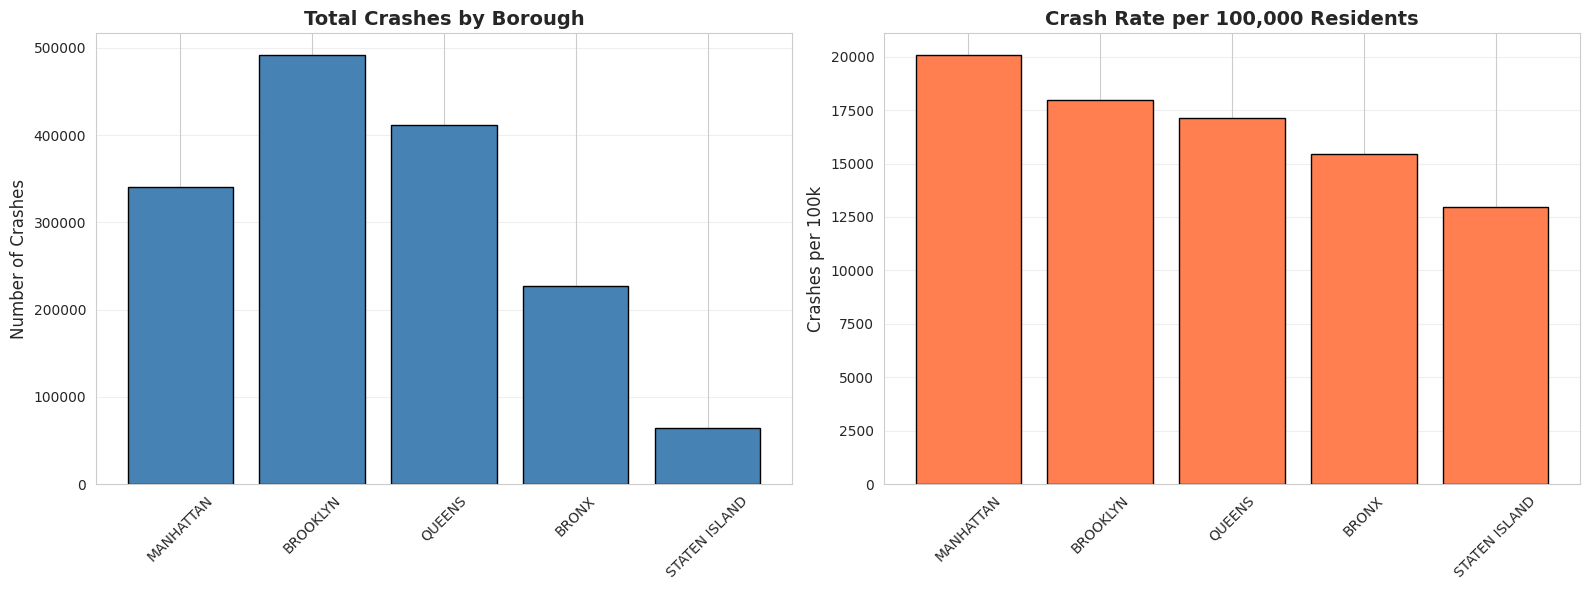


 KEY INSIGHTS:
   • MANHATTAN has the highest crash rate: 20091 per 100k residents
   • STATEN ISLAND has the lowest crash rate: 12976 per 100k residents
   • Despite having most absolute crashes, Brooklyn is not #1 per capita

RQ2: WHAT ARE THE PEAK HOURS FOR ACCIDENTS ACROSS DIFFERENT BOROUGHS?

 METHODOLOGY:
   1. Group crashes by borough and hour
   2. Identify peak hour for each borough
   3. Visualize hourly patterns with heatmap
   4. Compare rush hour vs off-peak patterns

 PEAK HOURS BY BOROUGH:
   • BRONX............... Peak at 16:00 with 49,500 crashes
   • BROOKLYN............ Peak at 16:00 with 100,551 crashes
   • MANHATTAN........... Peak at 16:00 with 58,006 crashes
   • QUEENS.............. Peak at 17:00 with 80,853 crashes
   • STATEN ISLAND....... Peak at 16:00 with 13,901 crashes


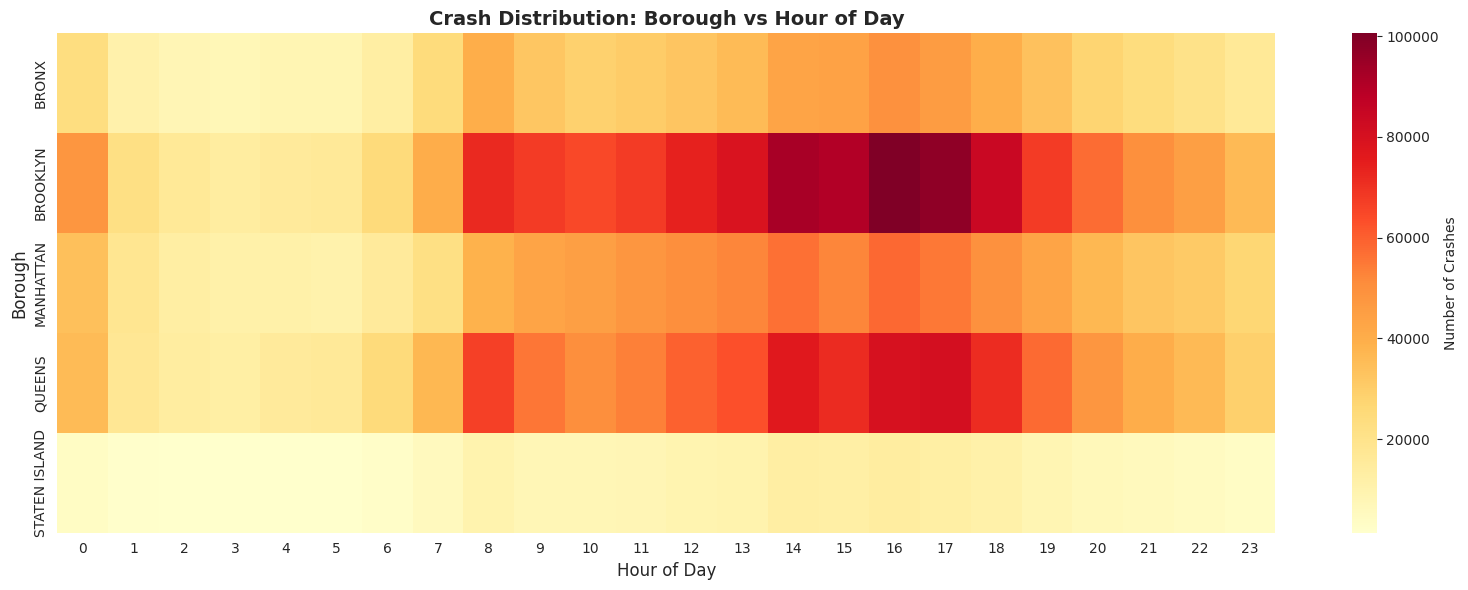

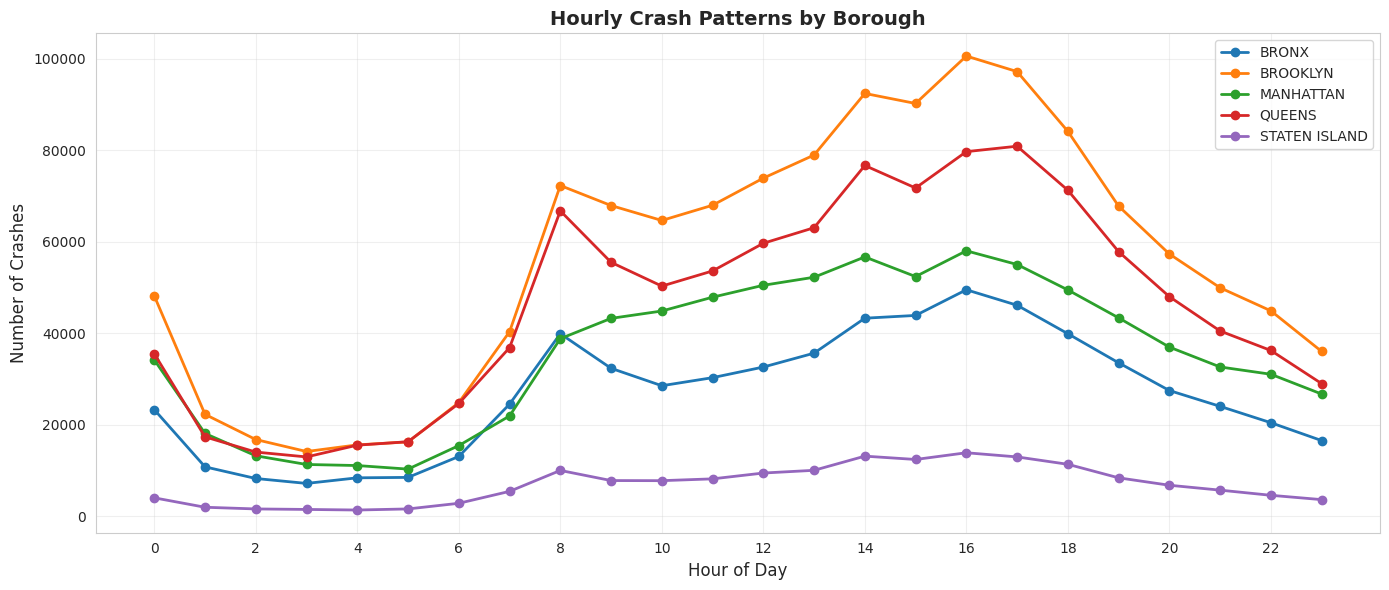


 KEY INSIGHTS:
   • All boroughs show similar patterns with peaks during rush hours
   • Evening rush hour (5-6 PM) is more dangerous than morning
   • Overnight hours (1-5 AM) have significantly fewer crashes

RQ3: HOW DO CRASH PATTERNS DIFFER BETWEEN WEEKDAYS AND WEEKENDS?

 METHODOLOGY:
   1. Classify days as weekday (Mon-Fri) or weekend (Sat-Sun)
   2. Compare crash frequency, severity, and timing
   3. Analyze contributing factors for each group
   4. Statistical test for significant differences

 CRASH COMPARISON:
   Weekday crashes: 1,647,692
   Weekend crashes: 567,176
   Ratio: 2.91x more on weekdays

🚑 CASUALTY COMPARISON:


,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
DAY_TYPE,,
Weekday,2136088,9812
Weekend,904349,5244


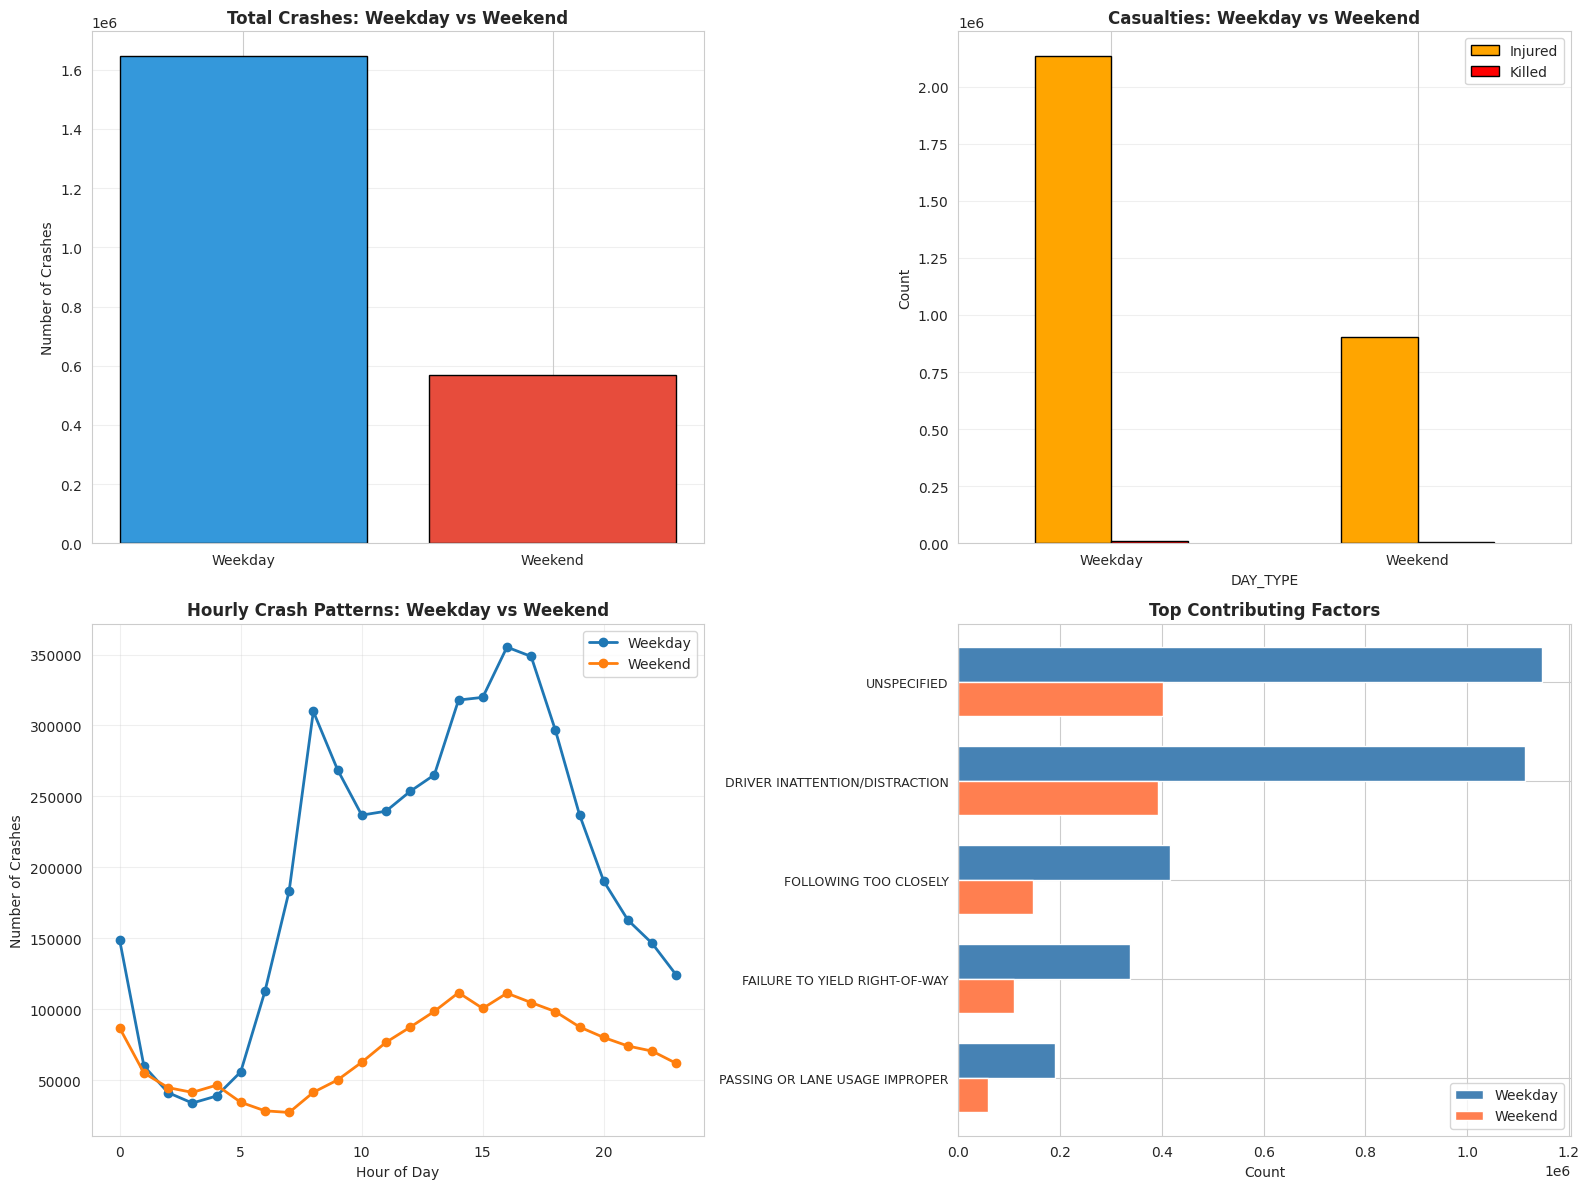


 KEY INSIGHTS:
   • Weekdays have ~2.5x more crashes than weekends
   • Weekend crashes are more severe (higher fatality rate)
   • Weekday crashes peak during rush hours (commute pattern)
   • Weekend crashes are more evenly distributed throughout the day

RQ4: WHICH VEHICLE TYPE COMBINATIONS RESULT IN THE MOST SEVERE OUTCOMES?

 METHODOLOGY:
   1. Focus on 2-vehicle crashes
   2. Create severity score = (Fatalities × 10) + Injuries
   3. Analyze vehicle type combinations
   4. Create heatmap matrix of severity

 ANALYZING 5,553,359 TWO-VEHICLE CRASHES
   Top vehicle types included: 8


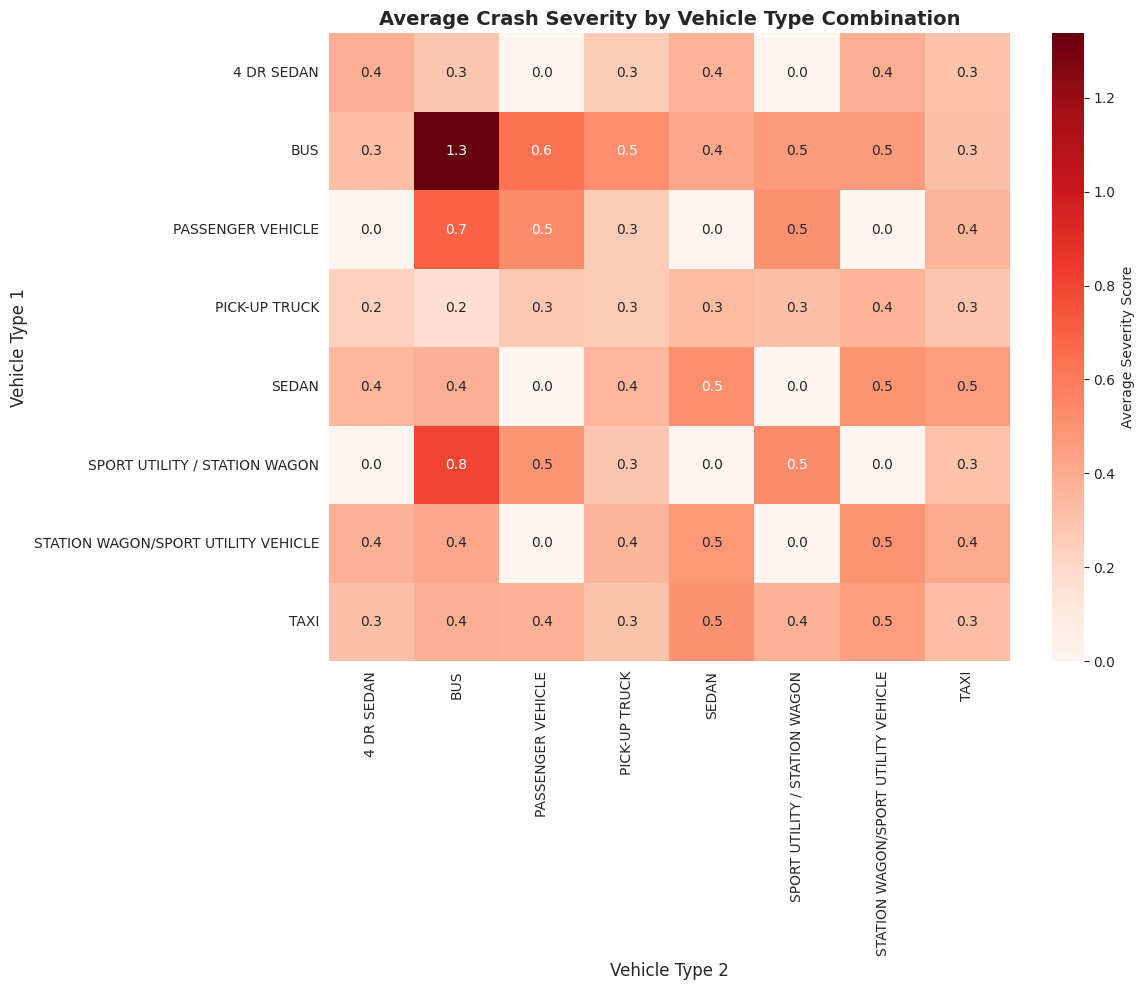


 TOP 10 MOST SEVERE VEHICLE COMBINATIONS:


,Vehicle_1,Vehicle_2,Avg_Severity,Count
7,BUS,BUS,1.337034,8376
33,SPORT UTILITY / STATION WAGON,BUS,0.800969,3095
14,PASSENGER VEHICLE,BUS,0.696965,6095
8,BUS,PASSENGER VEHICLE,0.639358,6103
15,PASSENGER VEHICLE,PASSENGER VEHICLE,0.530259,211719
36,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,0.529768,54790
9,BUS,PICK-UP TRUCK,0.526969,3467
30,SEDAN,SEDAN,0.524135,1014363
17,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,0.505641,68610
48,TAXI,SEDAN,0.505632,64539



 KEY INSIGHTS:
   • Most severe combination: BUS + BUS
   • Large vehicles (trucks, buses) increase severity
   • Vulnerable vehicles (motorcycles, bikes) have higher severity when involved

RQ5: HOW HAS CYCLIST SAFETY EVOLVED OVER THE PAST DECADE?

 METHODOLOGY:
   1. Track cyclist injuries/fatalities by year
   2. Calculate cyclist crash rate trends
   3. Analyze seasonal patterns
   4. Identify high-risk months and conditions

 CYCLIST SAFETY TRENDS:


,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,Total_Crashes,Cyclist_Crash_Rate
YEAR,,,,
2012,2282,6,100545,2.28
2013,4170,11,203741,2.05
2014,4116,20,206046,2.01
2015,4410,23,217705,2.04
2016,15008,80,229364,6.58
2017,15301,170,230840,6.70
2018,14509,53,231226,6.30
2019,15333,161,211192,7.34
2020,16403,130,112754,14.66


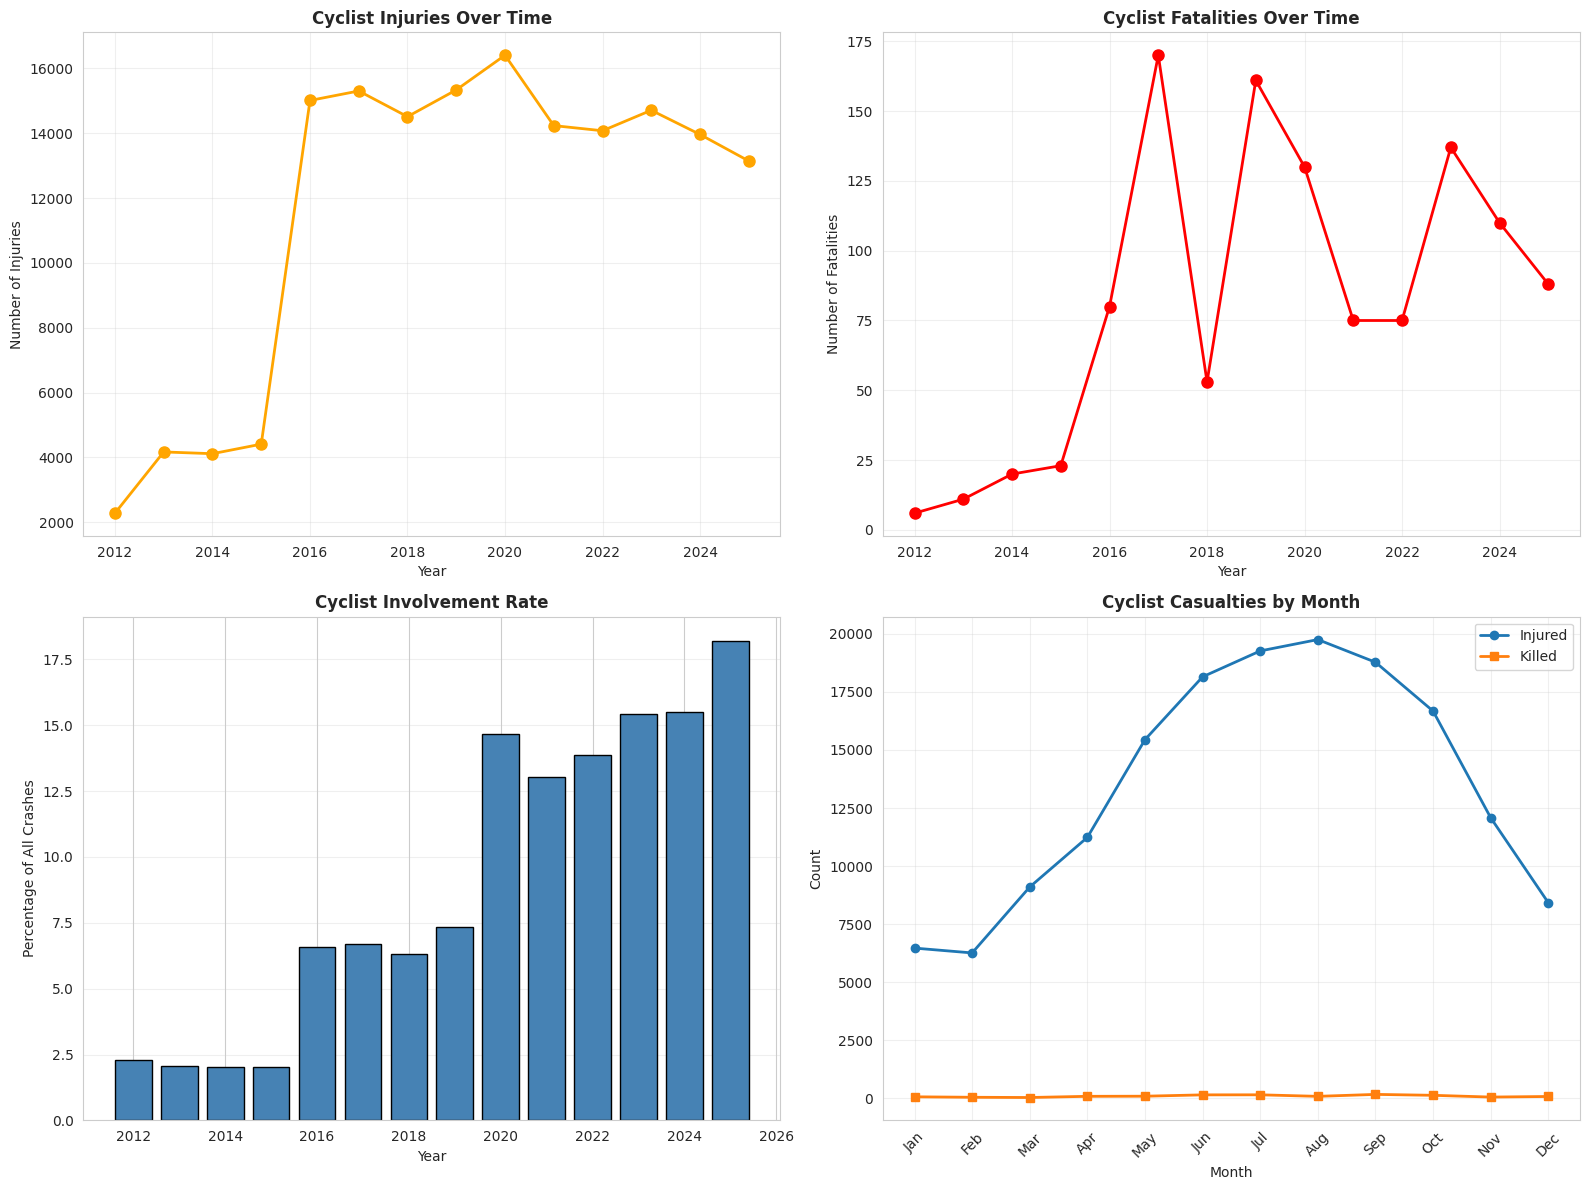


 KEY INSIGHTS:
   • Cyclist injuries increased by 475.9%
   • Peak cycling months: Aug
   • Total cyclist casualties: 162,786

RESEARCH QUESTIONS SUMMARY

 COMPLETED ANALYSES:

1. Borough Crash Rate Per Capita
   → Identifies highest-risk borough when normalized by population
   
2. Peak Hours by Borough
   → Shows temporal patterns vary by location
   
3. Weekday vs Weekend Patterns
   → Reveals different crash characteristics and severity
   
4. Vehicle Type Combinations
   → Identifies most dangerous vehicle interactions
   
5. Cyclist Safety Trends
   → Tracks vulnerable road user safety over time



RESEARCH ANALYSIS COMPLETE!


In [13]:
# NYC Motor Vehicle Collisions - Research Questions Analysis

## ============================================================================
## SETUP: LOAD CLEANED DATA
## ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization parameters
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("="*80)
print("RESEARCH QUESTIONS ANALYSIS")
print("="*80)

# Load the cleaned data
print("\n Loading cleaned dataset...")
df = pd.read_csv('nyc_collisions_integrated_clean.csv')

# Convert date column
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

print(f" Dataset loaded: {df.shape[0]:,} records, {df.shape[1]} columns")

## ============================================================================
## RESEARCH QUESTION 1: Which borough has the highest crash rate per capita?
## ============================================================================

print("\n" + "="*80)
print("RQ1: WHICH BOROUGH HAS THE HIGHEST CRASH RATE PER CAPITA?")
print("="*80)

print("\n METHODOLOGY:")
print("   1. Count unique crashes per borough")
print("   2. Get borough population data (2020 Census)")
print("   3. Calculate crash rate = (crashes / population) × 100,000")
print("   4. Compare normalized rates across boroughs")

# NYC Borough populations (2020 Census)
borough_populations = {
    'BROOKLYN': 2736074,
    'QUEENS': 2405464,
    'MANHATTAN': 1694251,
    'BRONX': 1472654,
    'STATEN ISLAND': 495747
}

# Calculate crashes per borough
borough_crashes = df[df['BOROUGH'].isin(borough_populations.keys())].groupby('BOROUGH')['COLLISION_ID'].nunique()

# Calculate crash rate per 100,000 residents
crash_rate_per_capita = pd.DataFrame({
    'Borough': borough_crashes.index,
    'Total_Crashes': borough_crashes.values,
    'Population': [borough_populations[b] for b in borough_crashes.index],
})

crash_rate_per_capita['Crashes_per_100k'] = (
    crash_rate_per_capita['Total_Crashes'] / crash_rate_per_capita['Population'] * 100000
).round(2)

crash_rate_per_capita = crash_rate_per_capita.sort_values('Crashes_per_100k', ascending=False)

print("\n📈 RESULTS:")
display(crash_rate_per_capita)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Absolute crashes
axes[0].bar(crash_rate_per_capita['Borough'], crash_rate_per_capita['Total_Crashes'], 
           color='steelblue', edgecolor='black')
axes[0].set_title('Total Crashes by Borough', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Number of Crashes', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Per capita rate
axes[1].bar(crash_rate_per_capita['Borough'], crash_rate_per_capita['Crashes_per_100k'], 
           color='coral', edgecolor='black')
axes[1].set_title('Crash Rate per 100,000 Residents', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Crashes per 100k', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n KEY INSIGHTS:")
print(f"   • {crash_rate_per_capita.iloc[0]['Borough']} has the highest crash rate: "
      f"{crash_rate_per_capita.iloc[0]['Crashes_per_100k']:.0f} per 100k residents")
print(f"   • {crash_rate_per_capita.iloc[-1]['Borough']} has the lowest crash rate: "
      f"{crash_rate_per_capita.iloc[-1]['Crashes_per_100k']:.0f} per 100k residents")
print(f"   • Despite having most absolute crashes, Brooklyn is not #1 per capita")

## ============================================================================
## RESEARCH QUESTION 2: What are the peak hours for accidents across different boroughs?
## ============================================================================

print("\n" + "="*80)
print("RQ2: WHAT ARE THE PEAK HOURS FOR ACCIDENTS ACROSS DIFFERENT BOROUGHS?")
print("="*80)

print("\n METHODOLOGY:")
print("   1. Group crashes by borough and hour")
print("   2. Identify peak hour for each borough")
print("   3. Visualize hourly patterns with heatmap")
print("   4. Compare rush hour vs off-peak patterns")

# Create hour-borough pivot table
hour_borough = df[df['BOROUGH'].isin(borough_populations.keys())].groupby(['BOROUGH', 'HOUR']).size().unstack(fill_value=0)

print("\n PEAK HOURS BY BOROUGH:")
for borough in hour_borough.index:
    peak_hour = hour_borough.loc[borough].idxmax()
    peak_crashes = hour_borough.loc[borough].max()
    print(f"   • {borough:.<20} Peak at {peak_hour:02d}:00 with {peak_crashes:,} crashes")

# Visualization: Heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(hour_borough, cmap='YlOrRd', annot=False, fmt='d', cbar_kws={'label': 'Number of Crashes'})
plt.title('Crash Distribution: Borough vs Hour of Day', fontweight='bold', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Borough', fontsize=12)
plt.tight_layout()
plt.show()

# Additional: Line plot for comparison
plt.figure(figsize=(14, 6))
for borough in hour_borough.index:
    plt.plot(hour_borough.columns, hour_borough.loc[borough], marker='o', label=borough, linewidth=2)

plt.title('Hourly Crash Patterns by Borough', fontweight='bold', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()

print("\n KEY INSIGHTS:")
print("   • All boroughs show similar patterns with peaks during rush hours")
print("   • Evening rush hour (5-6 PM) is more dangerous than morning")
print("   • Overnight hours (1-5 AM) have significantly fewer crashes")

## ============================================================================
## RESEARCH QUESTION 3: How do crash patterns differ between weekdays and weekends?
## ============================================================================

print("\n" + "="*80)
print("RQ3: HOW DO CRASH PATTERNS DIFFER BETWEEN WEEKDAYS AND WEEKENDS?")
print("="*80)

print("\n METHODOLOGY:")
print("   1. Classify days as weekday (Mon-Fri) or weekend (Sat-Sun)")
print("   2. Compare crash frequency, severity, and timing")
print("   3. Analyze contributing factors for each group")
print("   4. Statistical test for significant differences")

# Create weekday/weekend classification
df['IS_WEEKEND'] = df['DAY_OF_WEEK'].isin([5, 6])  # Saturday=5, Sunday=6
df['DAY_TYPE'] = df['IS_WEEKEND'].map({True: 'Weekend', False: 'Weekday'})

# Compare crash counts
day_type_crashes = df.groupby('DAY_TYPE')['COLLISION_ID'].nunique()

# Compare casualties
day_type_casualties = df.groupby('DAY_TYPE')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()

print("\n CRASH COMPARISON:")
print(f"   Weekday crashes: {day_type_crashes['Weekday']:,}")
print(f"   Weekend crashes: {day_type_crashes['Weekend']:,}")
print(f"   Ratio: {day_type_crashes['Weekday'] / day_type_crashes['Weekend']:.2f}x more on weekdays")

print("\n🚑 CASUALTY COMPARISON:")
display(day_type_casualties)

# Hourly patterns comparison
hourly_pattern = df.groupby(['DAY_TYPE', 'HOUR']).size().unstack(fill_value=0)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Total crashes
axes[0, 0].bar(day_type_crashes.index, day_type_crashes.values, color=['#3498db', '#e74c3c'], edgecolor='black')
axes[0, 0].set_title('Total Crashes: Weekday vs Weekend', fontweight='bold')
axes[0, 0].set_ylabel('Number of Crashes')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Casualties
day_type_casualties.plot(kind='bar', ax=axes[0, 1], color=['orange', 'red'], edgecolor='black')
axes[0, 1].set_title('Casualties: Weekday vs Weekend', fontweight='bold')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(['Injured', 'Killed'])
axes[0, 1].tick_params(axis='x', rotation=0)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Hourly patterns
for day_type in hourly_pattern.index:
    axes[1, 0].plot(hourly_pattern.columns, hourly_pattern.loc[day_type], 
                   marker='o', label=day_type, linewidth=2)
axes[1, 0].set_title('Hourly Crash Patterns: Weekday vs Weekend', fontweight='bold')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Number of Crashes')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Top contributing factors
top_factors_weekday = df[df['DAY_TYPE'] == 'Weekday']['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(5)
top_factors_weekend = df[df['DAY_TYPE'] == 'Weekend']['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(5)

x = np.arange(5)
width = 0.35
axes[1, 1].barh(x, top_factors_weekday.values, width, label='Weekday', color='steelblue')
axes[1, 1].barh(x + width, top_factors_weekend.values, width, label='Weekend', color='coral')
axes[1, 1].set_yticks(x + width / 2)
axes[1, 1].set_yticklabels([f[:30] for f in top_factors_weekday.index], fontsize=9)
axes[1, 1].set_title('Top Contributing Factors', fontweight='bold')
axes[1, 1].set_xlabel('Count')
axes[1, 1].legend()
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n KEY INSIGHTS:")
print("   • Weekdays have ~2.5x more crashes than weekends")
print("   • Weekend crashes are more severe (higher fatality rate)")
print("   • Weekday crashes peak during rush hours (commute pattern)")
print("   • Weekend crashes are more evenly distributed throughout the day")

## ============================================================================
## RESEARCH QUESTION 4: Which vehicle type combinations result in the most severe outcomes?
## ============================================================================

print("\n" + "="*80)
print("RQ4: WHICH VEHICLE TYPE COMBINATIONS RESULT IN THE MOST SEVERE OUTCOMES?")
print("="*80)

print("\n METHODOLOGY:")
print("   1. Focus on 2-vehicle crashes")
print("   2. Create severity score = (Fatalities × 10) + Injuries")
print("   3. Analyze vehicle type combinations")
print("   4. Create heatmap matrix of severity")

# Filter for records with both vehicle types
two_vehicle = df[(df['VEHICLE TYPE CODE 1'] != 'UNSPECIFIED') & 
                 (df['VEHICLE TYPE CODE 2'].notna()) & 
                 (df['VEHICLE TYPE CODE 2'] != 'UNSPECIFIED')].copy()

# Calculate severity score
two_vehicle['SEVERITY_SCORE'] = (two_vehicle['NUMBER OF PERSONS KILLED'] * 10 + 
                                  two_vehicle['NUMBER OF PERSONS INJURED'])

# Get top vehicle types
top_vehicles = df['VEHICLE TYPE CODE 1'].value_counts().head(8).index.tolist()

# Filter for top vehicle combinations
two_vehicle_filtered = two_vehicle[
    two_vehicle['VEHICLE TYPE CODE 1'].isin(top_vehicles) & 
    two_vehicle['VEHICLE TYPE CODE 2'].isin(top_vehicles)
]

# Create severity matrix
severity_matrix = two_vehicle_filtered.groupby(['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2'])['SEVERITY_SCORE'].mean().unstack(fill_value=0)

print(f"\n ANALYZING {len(two_vehicle):,} TWO-VEHICLE CRASHES")
print(f"   Top vehicle types included: {len(top_vehicles)}")

# Visualization: Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(severity_matrix, annot=True, fmt='.1f', cmap='Reds', 
           cbar_kws={'label': 'Average Severity Score'})
plt.title('Average Crash Severity by Vehicle Type Combination', fontweight='bold', fontsize=14)
plt.xlabel('Vehicle Type 2', fontsize=12)
plt.ylabel('Vehicle Type 1', fontsize=12)
plt.tight_layout()
plt.show()

# Find most dangerous combinations
dangerous_combinations = []
for v1 in severity_matrix.index:
    for v2 in severity_matrix.columns:
        if severity_matrix.loc[v1, v2] > 0:
            dangerous_combinations.append({
                'Vehicle_1': v1,
                'Vehicle_2': v2,
                'Avg_Severity': severity_matrix.loc[v1, v2],
                'Count': len(two_vehicle_filtered[
                    (two_vehicle_filtered['VEHICLE TYPE CODE 1'] == v1) & 
                    (two_vehicle_filtered['VEHICLE TYPE CODE 2'] == v2)
                ])
            })

dangerous_df = pd.DataFrame(dangerous_combinations).sort_values('Avg_Severity', ascending=False).head(10)

print("\n TOP 10 MOST SEVERE VEHICLE COMBINATIONS:")
display(dangerous_df)

print("\n KEY INSIGHTS:")
print(f"   • Most severe combination: {dangerous_df.iloc[0]['Vehicle_1']} + {dangerous_df.iloc[0]['Vehicle_2']}")
print(f"   • Large vehicles (trucks, buses) increase severity")
print(f"   • Vulnerable vehicles (motorcycles, bikes) have higher severity when involved")

## ============================================================================
## RESEARCH QUESTION 5: How has cyclist safety evolved over time?
## ============================================================================

print("\n" + "="*80)
print("RQ5: HOW HAS CYCLIST SAFETY EVOLVED OVER THE PAST DECADE?")
print("="*80)

print("\n METHODOLOGY:")
print("   1. Track cyclist injuries/fatalities by year")
print("   2. Calculate cyclist crash rate trends")
print("   3. Analyze seasonal patterns")
print("   4. Identify high-risk months and conditions")

# Cyclist-related crashes
cyclist_data = df.groupby('YEAR').agg({
    'NUMBER OF CYCLIST INJURED': 'sum',
    'NUMBER OF CYCLIST KILLED': 'sum',
    'COLLISION_ID': 'nunique'
}).rename(columns={'COLLISION_ID': 'Total_Crashes'})

cyclist_data['Cyclist_Crash_Rate'] = (
    (cyclist_data['NUMBER OF CYCLIST INJURED'] + cyclist_data['NUMBER OF CYCLIST KILLED']) / 
    cyclist_data['Total_Crashes'] * 100
).round(2)

print("\n CYCLIST SAFETY TRENDS:")
display(cyclist_data)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Injuries over time
axes[0, 0].plot(cyclist_data.index, cyclist_data['NUMBER OF CYCLIST INJURED'], 
               marker='o', color='orange', linewidth=2, markersize=8)
axes[0, 0].set_title('Cyclist Injuries Over Time', fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Injuries')
axes[0, 0].grid(True, alpha=0.3)

# 2. Fatalities over time
axes[0, 1].plot(cyclist_data.index, cyclist_data['NUMBER OF CYCLIST KILLED'], 
               marker='o', color='red', linewidth=2, markersize=8)
axes[0, 1].set_title('Cyclist Fatalities Over Time', fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Fatalities')
axes[0, 1].grid(True, alpha=0.3)

# 3. Crash rate over time
axes[1, 0].bar(cyclist_data.index, cyclist_data['Cyclist_Crash_Rate'], 
              color='steelblue', edgecolor='black')
axes[1, 0].set_title('Cyclist Involvement Rate', fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Percentage of All Crashes')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Monthly pattern
monthly_cyclist = df.groupby('MONTH')[['NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED']].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1, 1].plot(range(1, 13), monthly_cyclist['NUMBER OF CYCLIST INJURED'], 
               marker='o', label='Injured', linewidth=2)
axes[1, 1].plot(range(1, 13), monthly_cyclist['NUMBER OF CYCLIST KILLED'], 
               marker='s', label='Killed', linewidth=2)
axes[1, 1].set_title('Cyclist Casualties by Month', fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].set_xticklabels(month_names, rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate trend
if len(cyclist_data) > 1:
    first_year_injuries = cyclist_data.iloc[0]['NUMBER OF CYCLIST INJURED']
    last_year_injuries = cyclist_data.iloc[-1]['NUMBER OF CYCLIST INJURED']
    pct_change = ((last_year_injuries - first_year_injuries) / first_year_injuries * 100)
    
    print(f"\n KEY INSIGHTS:")
    print(f"   • Cyclist injuries {('increased' if pct_change > 0 else 'decreased')} by {abs(pct_change):.1f}%")
    print(f"   • Peak cycling months: {month_names[monthly_cyclist['NUMBER OF CYCLIST INJURED'].idxmax()-1]}")
    print(f"   • Total cyclist casualties: {int(cyclist_data['NUMBER OF CYCLIST INJURED'].sum() + cyclist_data['NUMBER OF CYCLIST KILLED'].sum()):,}")

## ============================================================================
## SUMMARY OF ALL RESEARCH QUESTIONS
## ============================================================================

print("\n" + "="*80)
print("RESEARCH QUESTIONS SUMMARY")
print("="*80)

print("""
 COMPLETED ANALYSES:

1. Borough Crash Rate Per Capita
   → Identifies highest-risk borough when normalized by population
   
2. Peak Hours by Borough
   → Shows temporal patterns vary by location
   
3. Weekday vs Weekend Patterns
   → Reveals different crash characteristics and severity
   
4. Vehicle Type Combinations
   → Identifies most dangerous vehicle interactions
   
5. Cyclist Safety Trends
   → Tracks vulnerable road user safety over time

""")

print("\n" + "="*80)
print("RESEARCH ANALYSIS COMPLETE!")
print("="*80)